# BREAST CANCER PREDICTION ICA PROJECT

In [1]:
#Importation of Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



#This importation is to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
1,M,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
2,B,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
3,B,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
4,M,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
5,B,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


# STATISTICAL ANALYSIS

In [3]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5015, 31)

In [4]:
#details of the last 5 rows of the dataset  
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
5011,B,-0.740945,0.299536,0.525151,-1.026108,-2.498535,1.684233,-0.431974,0.458064,1.040516,...,0.126595,-0.980428,-0.100143,-0.649952,1.861477,-1.636387,-3.998390,-0.713670,0.657338,-0.688494
5012,B,0.630046,-1.431621,-3.541158,1.360829,3.827369,3.195824,1.988697,-0.038839,-0.289488,...,-0.784634,-0.626414,-1.257574,-0.148175,3.097885,-3.837613,-0.106725,1.786798,-0.500343,-2.279473
5013,B,0.946636,-2.902138,-3.119418,2.742162,7.000024,6.878013,-0.436317,0.923706,1.317446,...,1.443981,0.179008,0.097126,0.144724,2.396319,-1.281459,0.898836,2.499513,-2.107364,-0.524659
5014,M,0.239837,-2.315114,-1.400947,-1.327012,-1.024908,-0.790157,1.517334,0.320616,-1.282254,...,0.056867,-2.065378,0.995654,-0.769114,3.992847,-4.710323,-7.638259,2.096088,1.535131,1.255678
5015,M,-0.410249,0.589452,1.365417,0.711706,0.321714,-7.001669,-1.901880,-0.789668,-0.321557,...,-2.437734,0.208962,0.413331,-0.827885,-2.620811,-2.820564,-0.537160,2.524056,0.775031,0.459024


In [5]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 1 to 5015
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5015 non-null   object 
 1   radius_mean              5015 non-null   float64
 2   texture_mean             5015 non-null   float64
 3   perimeter_mean           5015 non-null   float64
 4   area_mean                5015 non-null   float64
 5   smoothness_mean          5015 non-null   float64
 6   compactness_mean         5015 non-null   float64
 7   concavity_mean           5015 non-null   float64
 8   concave points_mean      5015 non-null   float64
 9   symmetry_mean            5015 non-null   float64
 10  fractal_dimension_mean   5015 non-null   float64
 11  radius_se                5015 non-null   float64
 12  texture_se               5015 non-null   float64
 13  perimeter_se             5015 non-null   float64
 14  area_se                  5015

In [8]:
#Description of the Dataset showing the Mean, Median, Mode, Standard Deviation, Minimum and Maximum Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,5015.0,-0.000891,0.983444,-3.464809,-0.660010,0.013061,0.665335,3.760155
texture_mean,5015.0,-0.554704,2.232376,-7.436473,-2.190959,-0.483064,1.099535,6.006848
perimeter_mean,5015.0,-0.554793,2.279260,-10.236226,-2.228786,-0.575160,1.034569,6.054870
area_mean,5015.0,-0.936175,2.136099,-6.633334,-2.418635,-1.068058,0.392419,7.201103
smoothness_mean,5015.0,-1.391810,4.579244,-16.006729,-4.516750,-1.825548,1.401192,14.436964
compactness_mean,5015.0,-0.461217,5.125060,-14.309880,-4.402932,-1.052080,3.593830,15.157340
concavity_mean,5015.0,0.020568,0.993755,-3.153111,-0.653703,0.026035,0.678656,3.766180
concave points_mean,5015.0,-0.014652,1.001308,-3.940008,-0.691080,-0.007397,0.650388,3.712795
symmetry_mean,5015.0,-0.382991,2.421989,-7.928758,-2.089479,-0.511122,1.295651,9.168892
fractal_dimension_mean,5015.0,0.000486,2.331952,-6.613662,-1.654903,-0.189175,1.608768,9.499183


# DATA PREPROCESSING

In [9]:
#Checking for Missing Values in the Dataset using Columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#Checking for Missing Values in all the Dataset
df.isnull().sum().sum()

#We have no missing values in the Dataset

0

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [12]:
#Checking the number of categorical columns in the dataset
#We have only one categorical column in the dataset which is the diagnosis column
cat = df.select_dtypes(include='object').columns
print ("There is only" ,len(cat), "categorical column in the dataset which is the diagnosis column")

There is only 1 categorical column in the dataset which is the diagnosis column


In [13]:
#This has two unique values which are Benign (B) and Malignant (M)
df['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [14]:
#Checking the number of Numberical columns in the dataset
numer = df.select_dtypes(include=np.number).columns
print ("There are " ,len(numer), "categorical column in the dataset which are the independent variables")

There are  30 categorical column in the dataset which are the independent variables


# Box Plot of all my features with diagnosis showing the outliers as well which will be removed

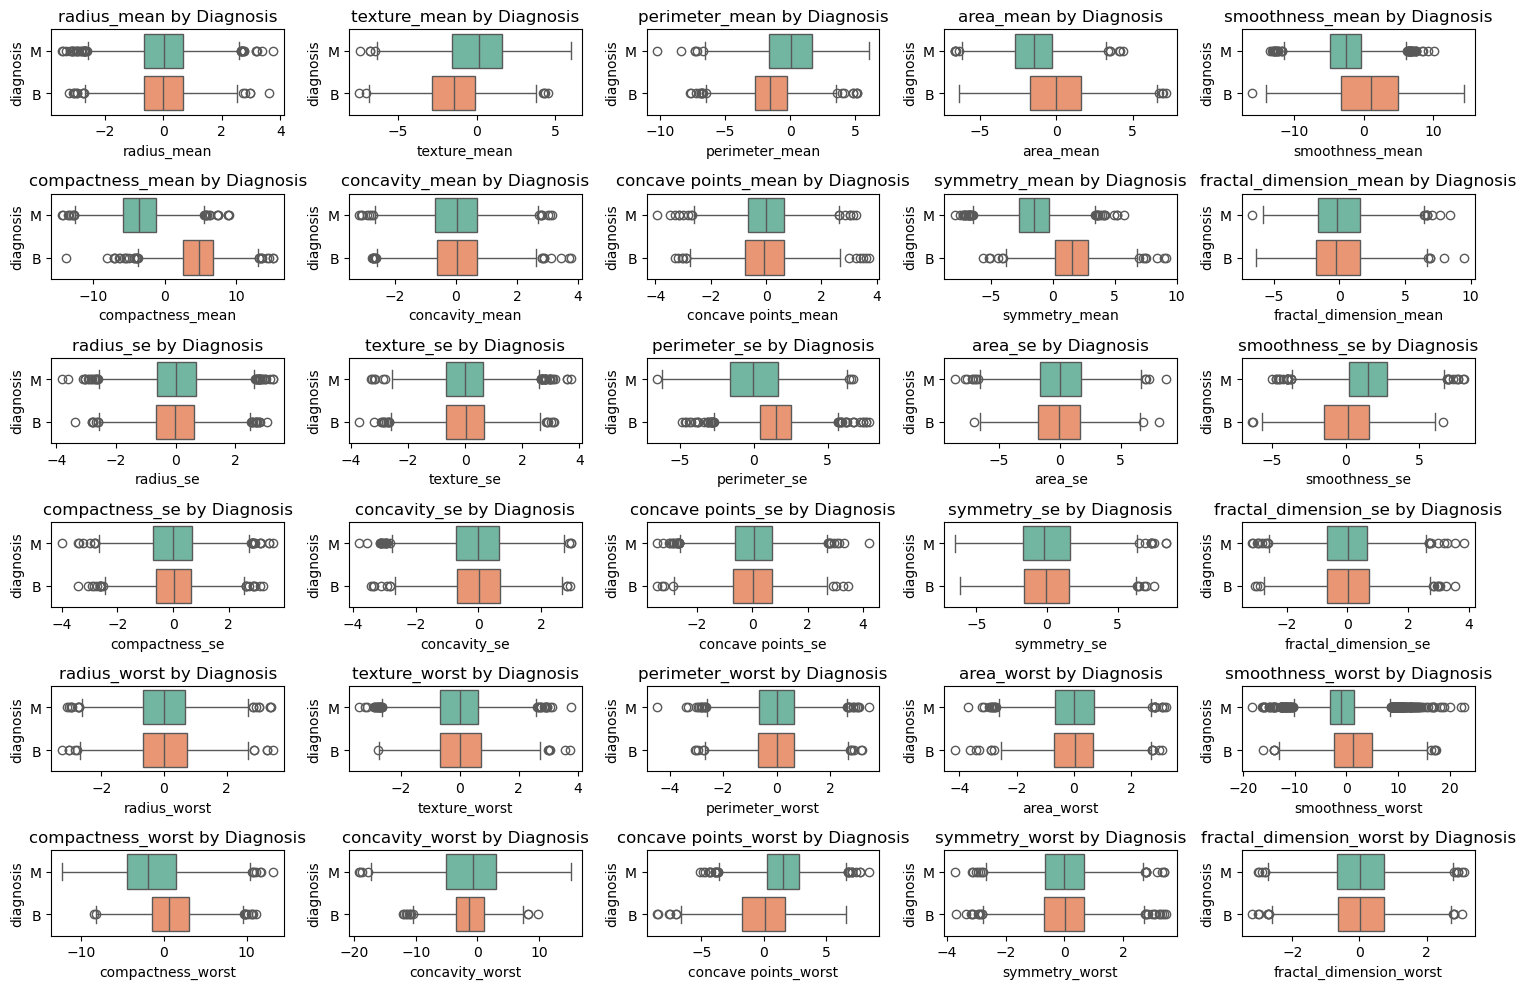

In [15]:
features_to_plot = df.drop(['diagnosis'], axis=1).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(6, 5, i)  # Adjust grid size (6,5) based on number of features in this case we have 30 features
    sns.boxplot(x=feature, y='diagnosis', data=df , palette='Set2')
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()
#We can see the outliers which we'll definitely have to remove

In [16]:
#Checking for the unique values in the numerical column
print("The unique values in the numerical columns are: ")
for i in numer:
    print(i,"has: ",df.loc[:,i].nunique(),"unique values")
    
#This shows that the values in all the numerical columns are unique

The unique values in the numerical columns are: 
radius_mean has:  5015 unique values
texture_mean has:  5015 unique values
perimeter_mean has:  5015 unique values
area_mean has:  5015 unique values
smoothness_mean has:  5015 unique values
compactness_mean has:  5015 unique values
concavity_mean has:  5015 unique values
concave points_mean has:  5015 unique values
symmetry_mean has:  5015 unique values
fractal_dimension_mean has:  5015 unique values
radius_se has:  5015 unique values
texture_se has:  5015 unique values
perimeter_se has:  5015 unique values
area_se has:  5015 unique values
smoothness_se has:  5015 unique values
compactness_se has:  5015 unique values
concavity_se has:  5015 unique values
concave points_se has:  5015 unique values
symmetry_se has:  5015 unique values
fractal_dimension_se has:  5015 unique values
radius_worst has:  5015 unique values
texture_worst has:  5015 unique values
perimeter_worst has:  5015 unique values
area_worst has:  5015 unique values
smoothn

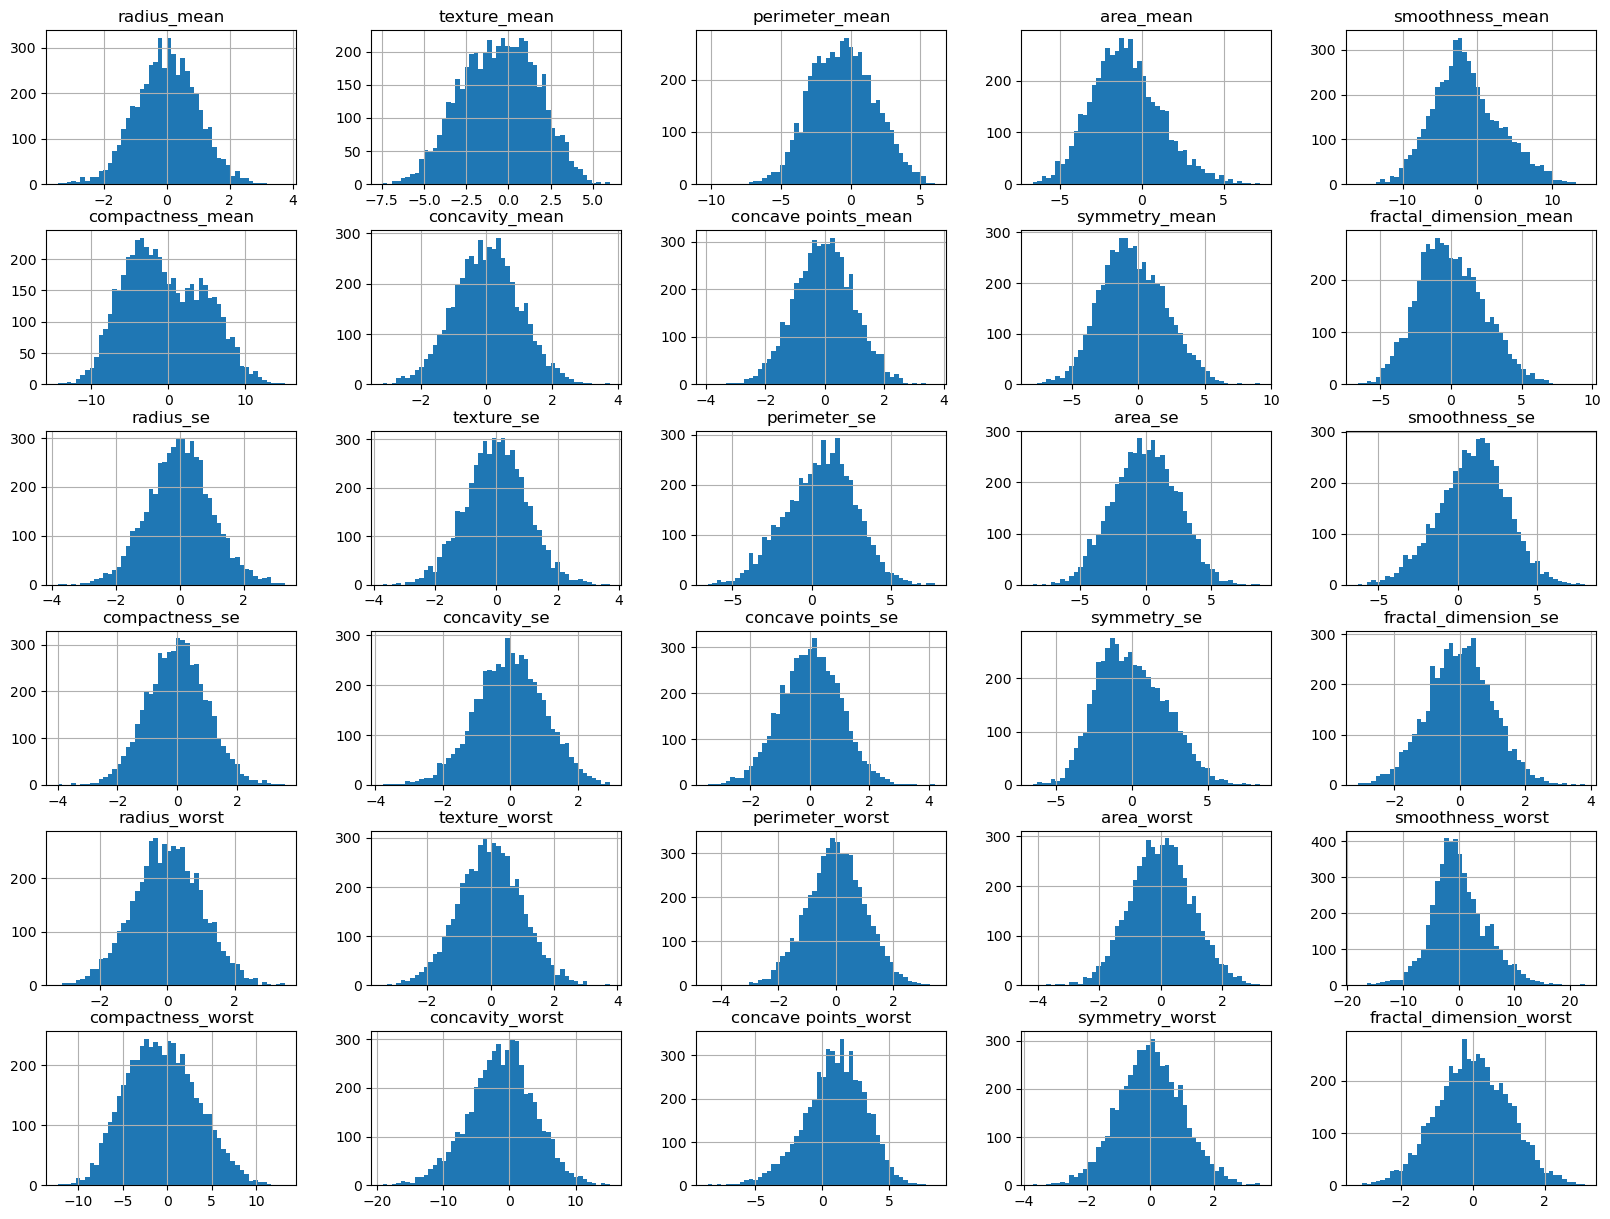

In [17]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

Features like compactness_worst or concave points_worst being long horizontally could suggest that some tumors have highly abnormal shapes or structures, which are often associated with malignancy.

concave points_worst has a wide horizontal spread with a tail toward higher values, it might be a strong indicator of malignancy, as malignant tumors often have more concave points.

Now I'm going to plot a Histogram with both Malign and Benign

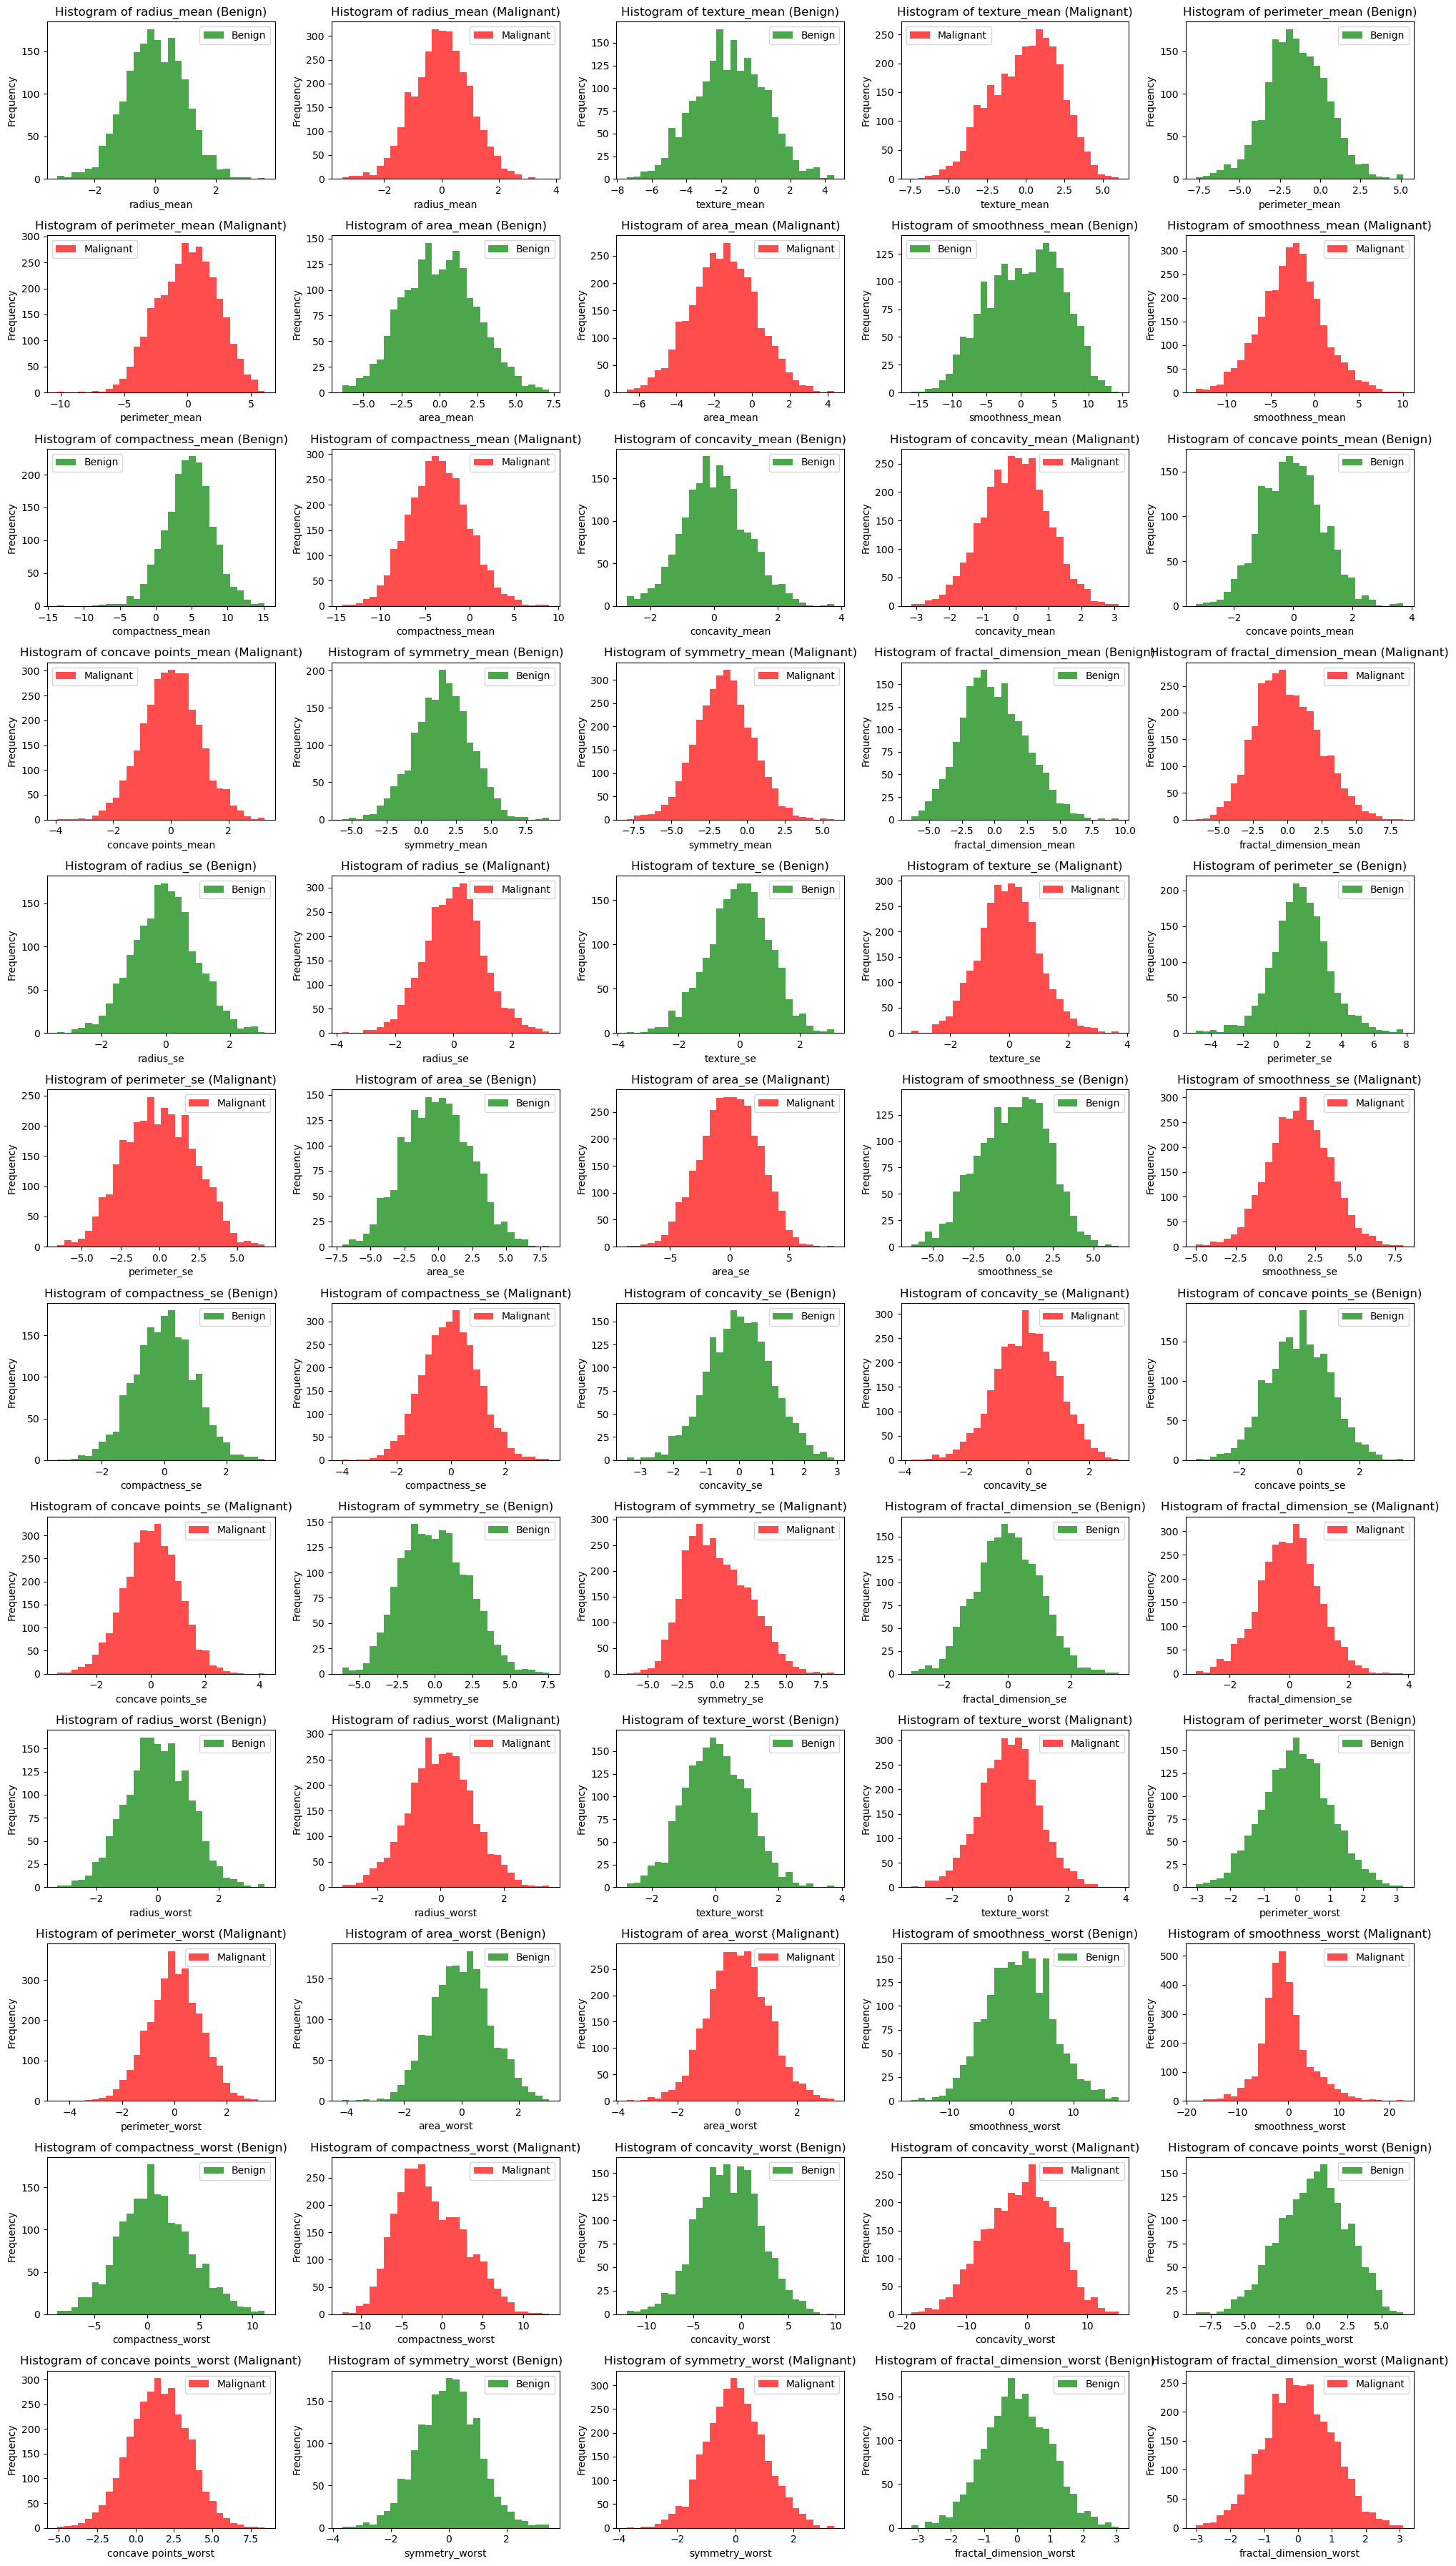

In [18]:
dropdiagnosis =  df.drop(columns=['diagnosis'])
features = dropdiagnosis.columns.tolist()

# Number of features and set up the grid
n_features = len(features)
n_cols = 5  # Five columns (each pair of benign and malignant histograms takes 2 columns, but we adjust for 5 total)
n_subplots = 2 * n_features  # Total number of histograms (benign + malignant for each feature)
n_rows = (n_subplots + n_cols - 1) // n_cols  # Calculate number of rows to fit all subplots

# Create a figure with subplots
plt.figure(figsize=(20, 3 * n_rows))  # Increased width to accommodate 5 columns

# Loop through each feature
for i, feature in enumerate(features, 1):
    # Extract data for benign and malignant
    benign_data = df[df['diagnosis'] == 'B'][feature]
    malignant_data = df[df['diagnosis'] == 'M'][feature]

    # Plot benign histogram
    plt.subplot(n_rows, n_cols, 2 * i - 1)  # Position for benign (odd indices)
    plt.hist(benign_data, bins=30, color='green', alpha=0.7, label='Benign')
    plt.title(f'Histogram of {feature} (Benign)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    # Plot malignant histogram
    plt.subplot(n_rows, n_cols, 2 * i)  # Position for malignant (even indices)
    plt.hist(malignant_data, bins=30, color='red', alpha=0.7, label='Malignant')
    plt.title(f'Histogram of {feature} (Malignant)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

The histograms show that malignant tumors generally have wider and more spread-out distributions, often with higher frequency peaks at larger values, indicating greater variability and larger sizes or irregularities compared to benign tumors, which tend to have narrower, more concentrated distributions. 

This Histogram suggests that features like area_worst, concavity_worst, and concave points_worst, which show significant differences in spread and peak values between benign and malignant cases, could be key indicators for distinguishing tumor types, potentially aiding in diagnostic or classification models.

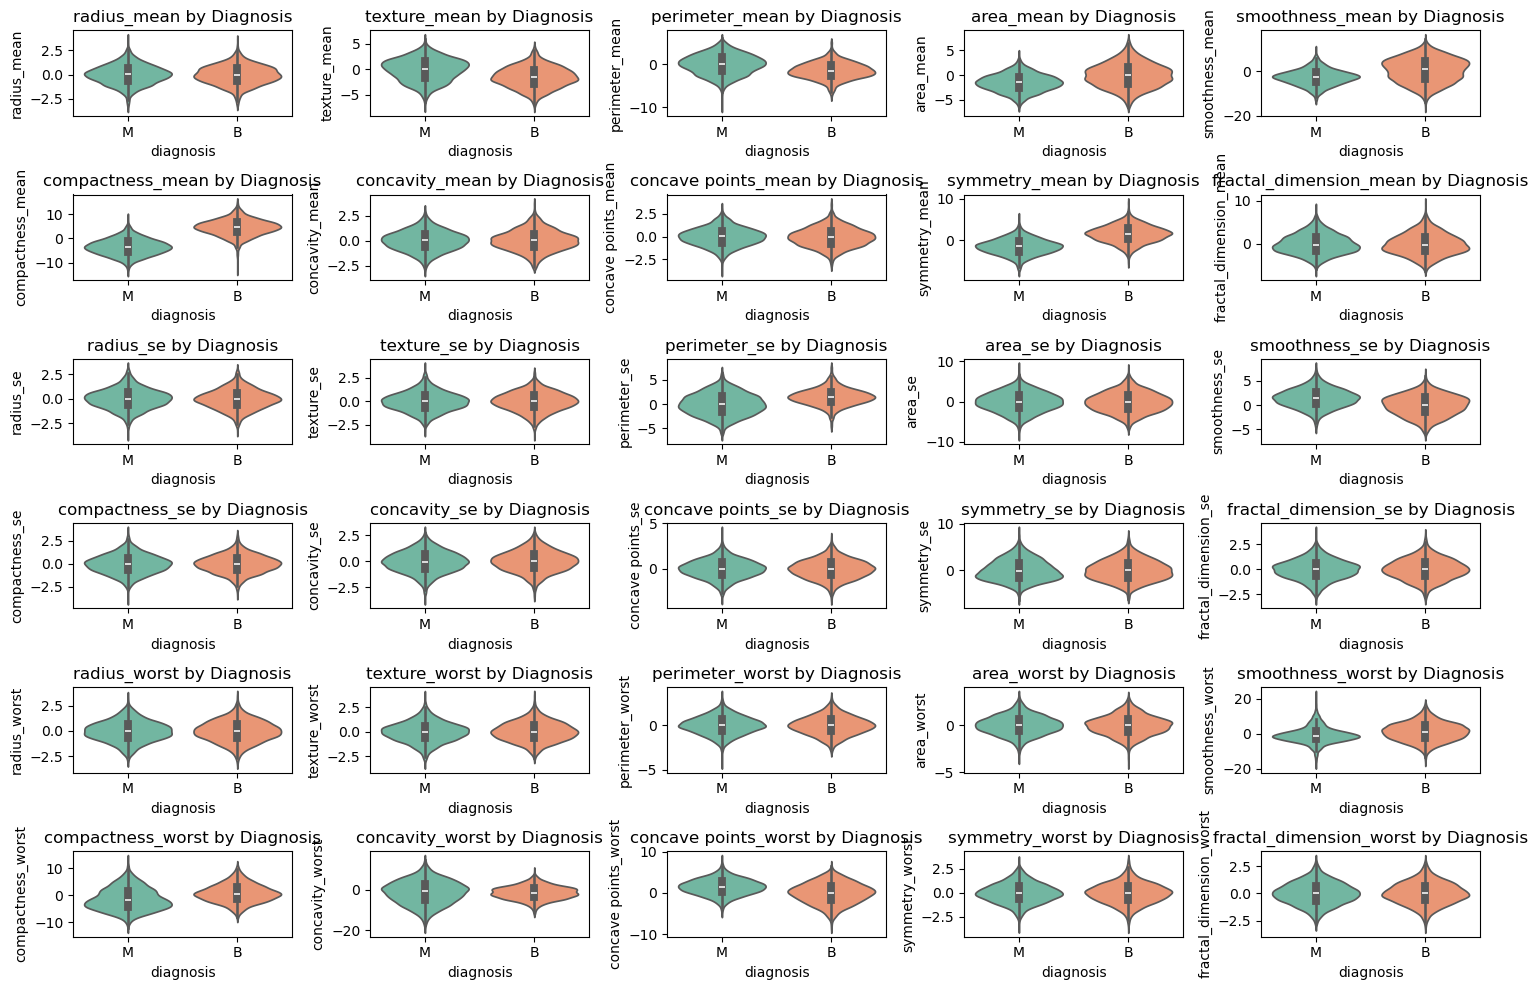

In [19]:
features_to_plot = df.drop(['diagnosis'], axis=1).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(6, 5, i)  # Adjust grid size (6,5) based on number of features in this case we have 30 features
    sns.violinplot(x='diagnosis', y=feature, data=df , palette='Set2')
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()


Malignant tumors (M) generally have wider violin plots and are shifted toward higher values, especially for area, perimeter, compactness, concavity, and concave points. This aligns with the biological expectation that malignant tumors are larger, more irregular, and more heterogeneous.

In [20]:
# The Total Malignant and Benign Diagnosis in the Dataset
# 1866 Benign Diagnosis
# 3149 Malignant Diagnosis
# 0 Means the Tumor is not Cancerous
# 1 Means the Tumor is Cancerous
tumors = df['diagnosis'].value_counts()
print(tumors)
print("Percentage of patience with Dangerous Tumour (Malignant): "+str(round(tumors['M']*100/5015,2)))
print("Percentage of patience without Dangerous Tumour (Benign): "+str(round(tumors['B']*100/5015,2)))

diagnosis
M    3149
B    1866
Name: count, dtype: int64
Percentage of patience with Dangerous Tumour (Malignant): 62.79
Percentage of patience without Dangerous Tumour (Benign): 37.21


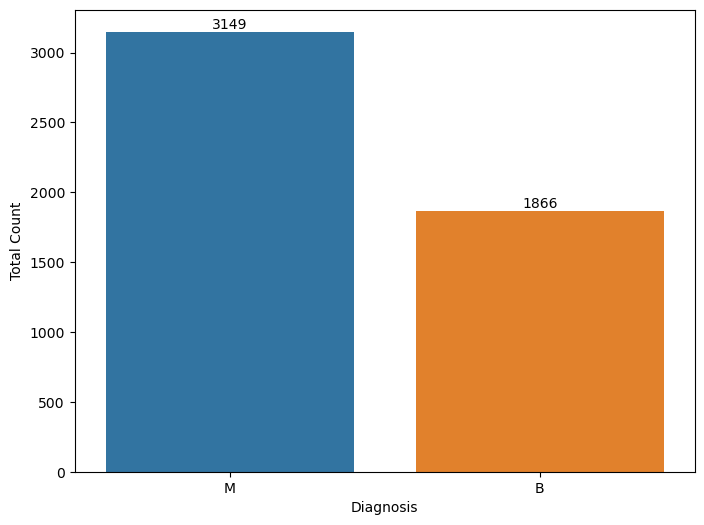

In [21]:
#Showing Data Distribution of the only categorical columns Diagnosis
plt.figure(figsize=(8, 6))
diag = sns.countplot(x='diagnosis', data=df, palette=['#1f77b4', '#ff7f0e'])
diag.bar_label(diag.containers[0])
diag.bar_label(diag.containers[1])
plt.xlabel("Diagnosis")
plt.ylabel("Total Count")
plt.show()


# FEATURES ENGINEERING

In [33]:
# There are 3 sets of Mean Columns in the Dataset which are the Mean Columns, Standard Error Columns and Worst Columns
# We will be using the Mean Columns for the Prediction but Pairplot will be used to show the relationship between the Mean Columns, Standard Error Columns and Worst Columns with the Diagnosis Column
# and the Diagnosis Column

#Getting Mean Colon Lump with Diagnosis
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Standard deviation Lump Columns with diagnosis
standarderror_col = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst Case Lump column with diagnosis
worst_col = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



In [34]:
print("-----------------------------------")
print('Mean set of all features')
print(mean_col)
print(len(mean_col), 'features')
print("-----------------------------------")
print('Standard Error set of all features')
print(standarderror_col)
print(len(standarderror_col), 'features')
print("------------------------------------")
print('Worst set of all features')
print(worst_col)
print(len(worst_col), 'features')


-----------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features
-----------------------------------
Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features
------------------------------------
Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features


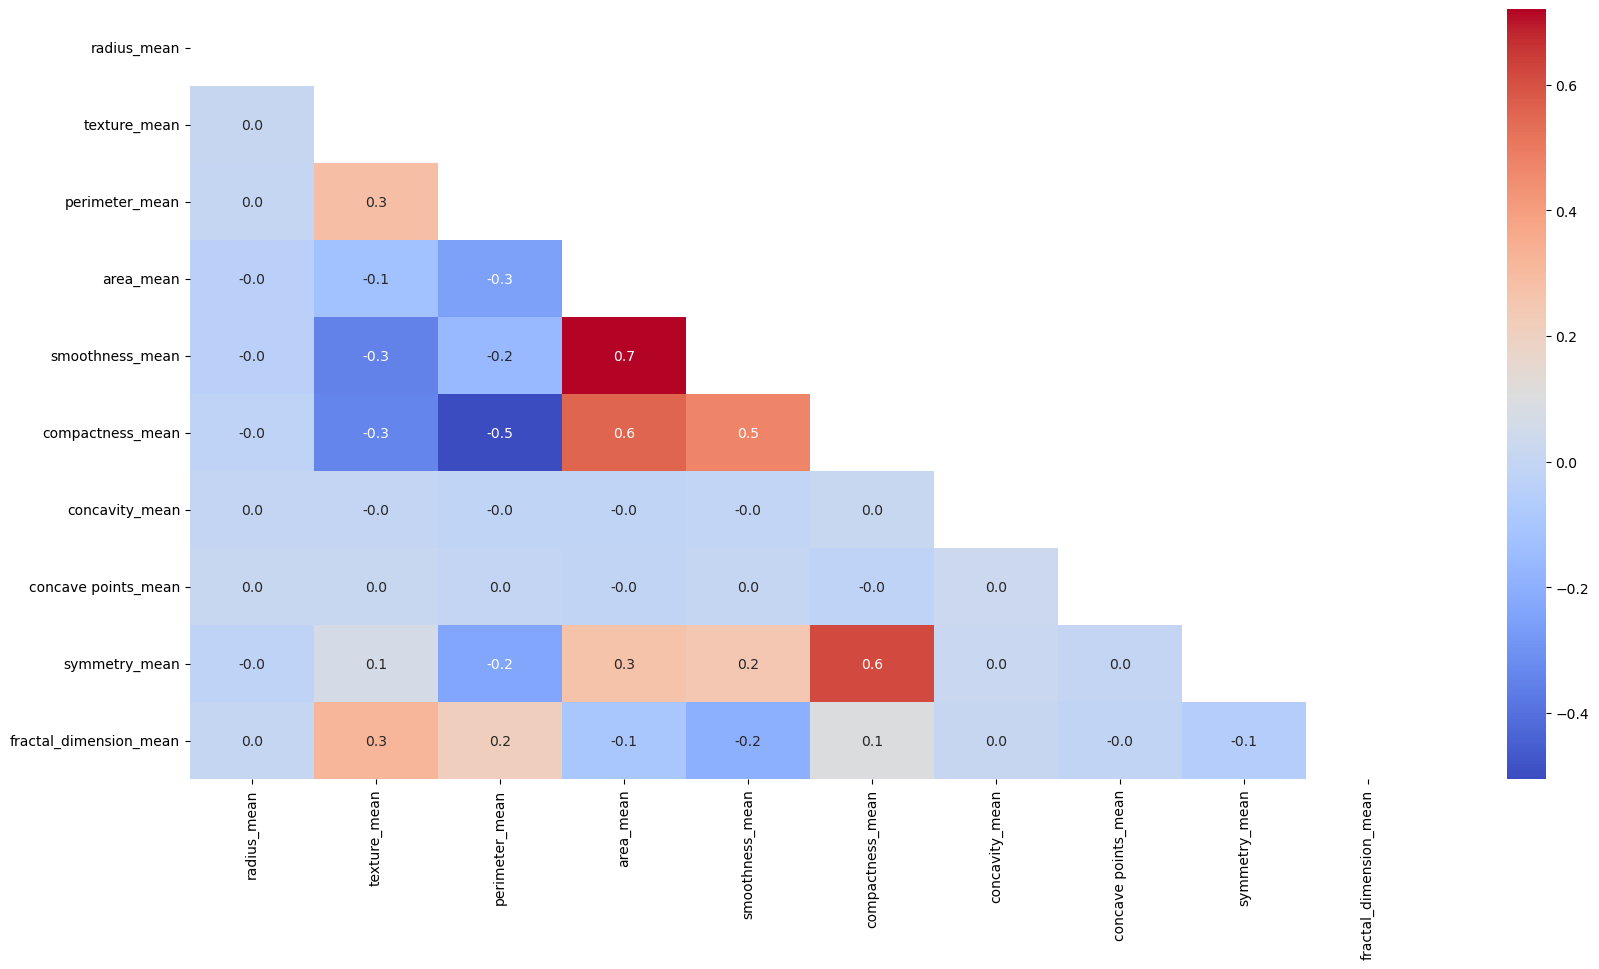

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[mean_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[mean_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

Features such as Smothmess_mean and area_mean will be dropped due to its high correlation greater than 0.7

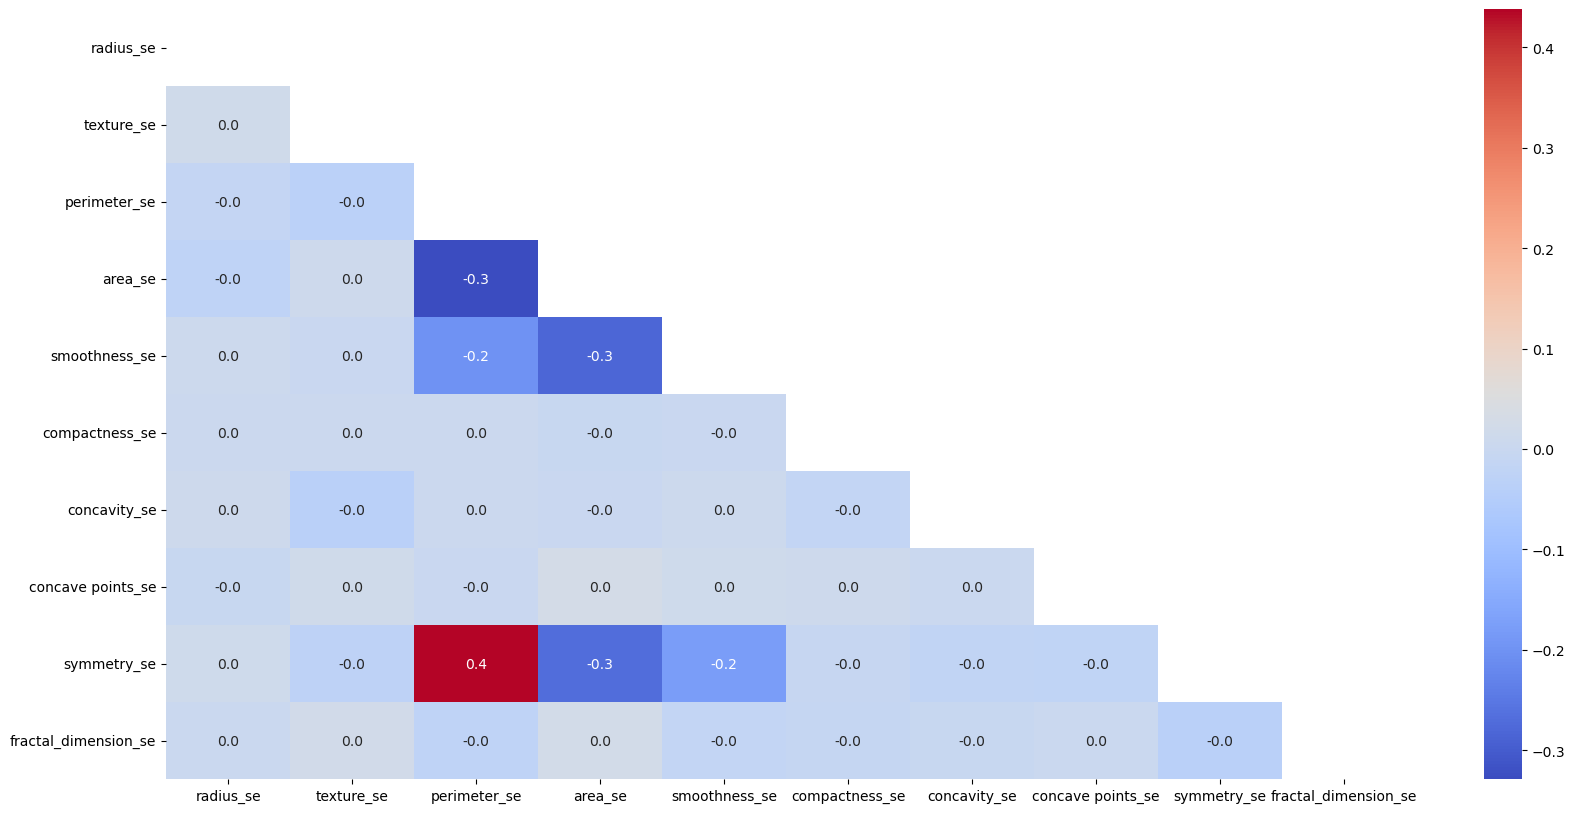

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[standarderror_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[standarderror_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

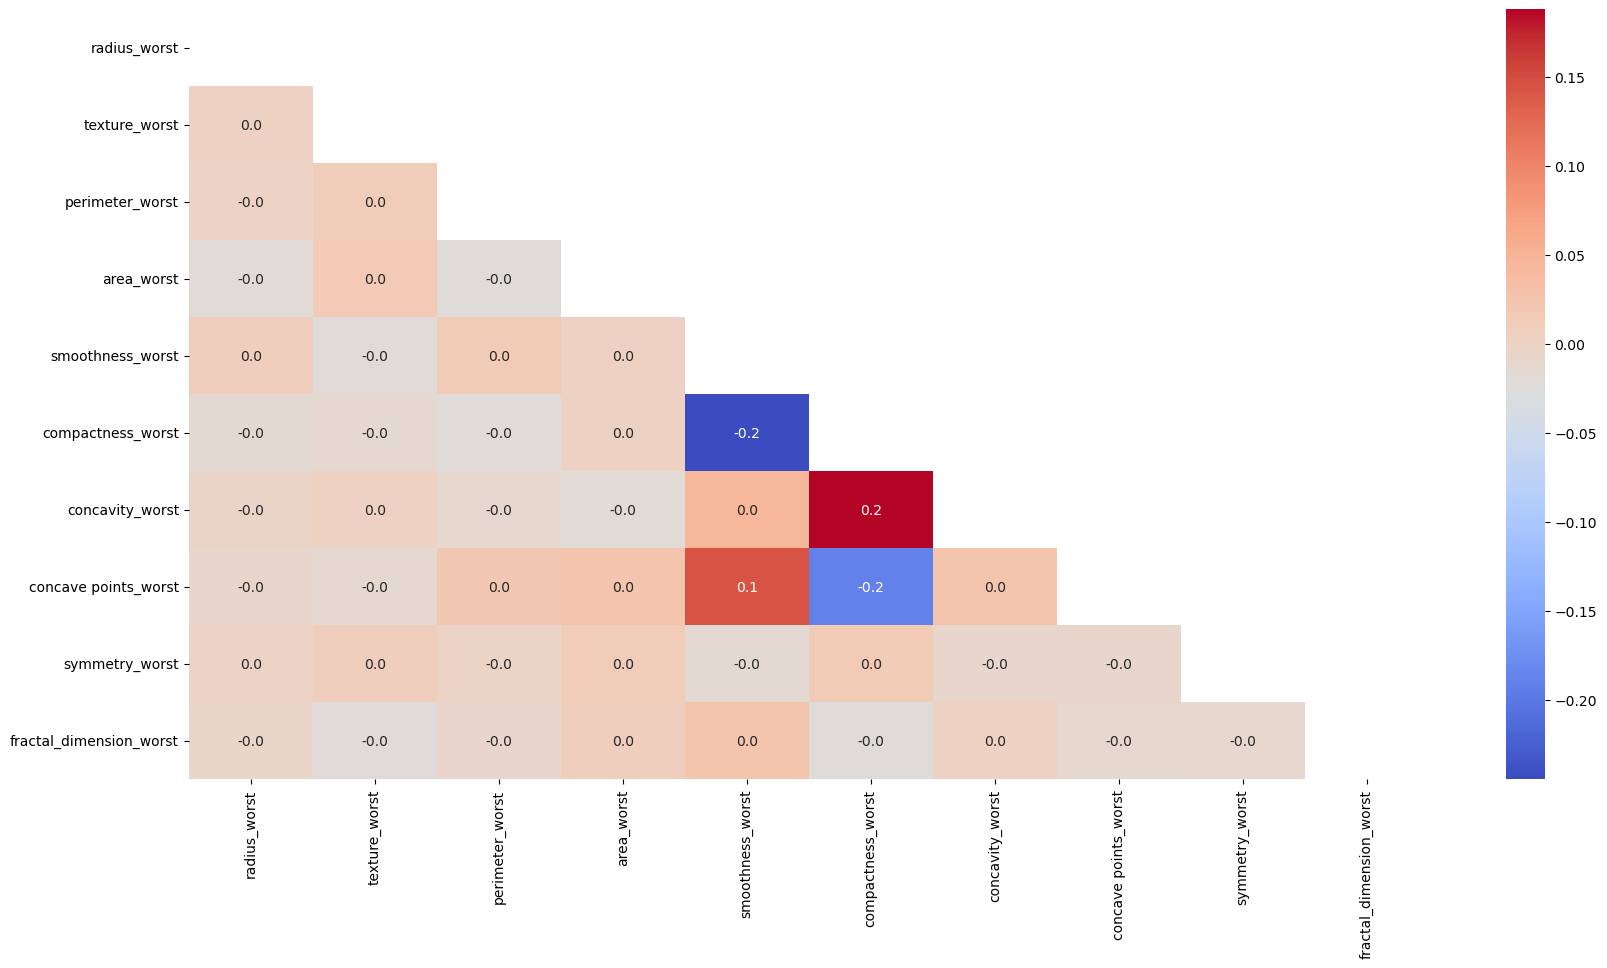

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[worst_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[standarderror_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

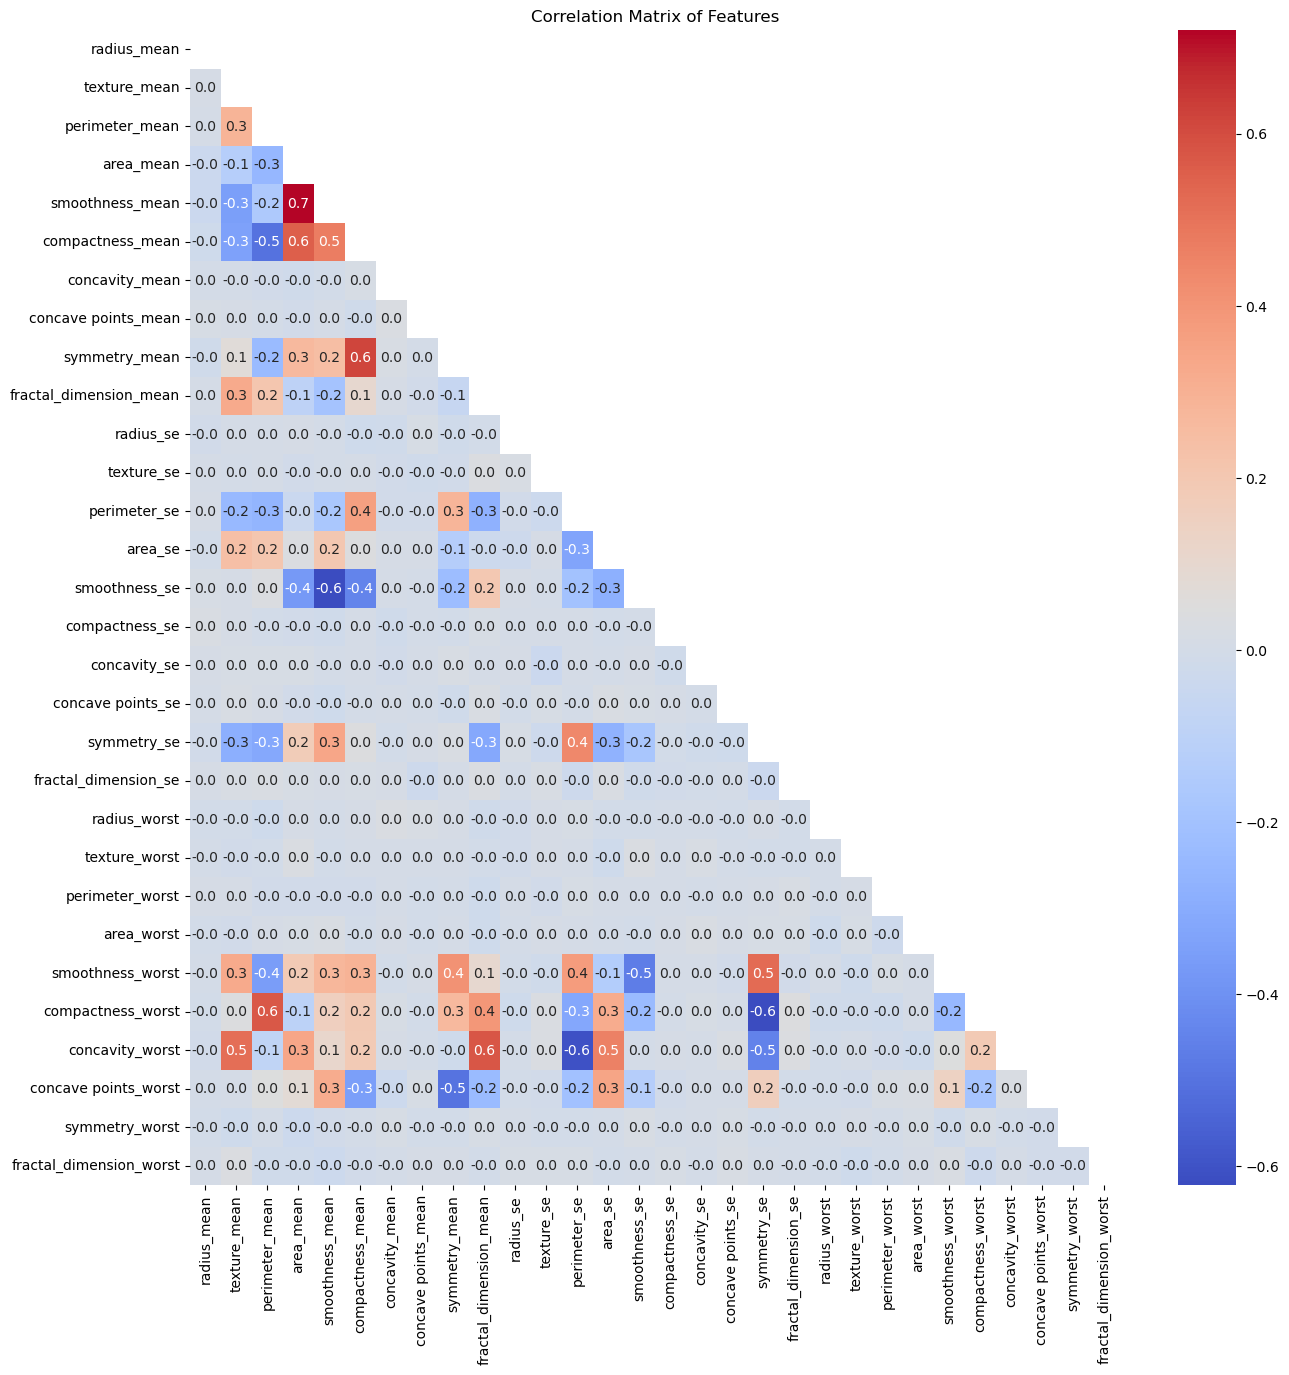

In [45]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.drop(columns=['diagnosis'], errors='ignore').corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df.drop(columns=['diagnosis'], errors='ignore').corr(), dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()


# Univariate analysis on each features to discover those which allow to discretize the variable 'diagnosis

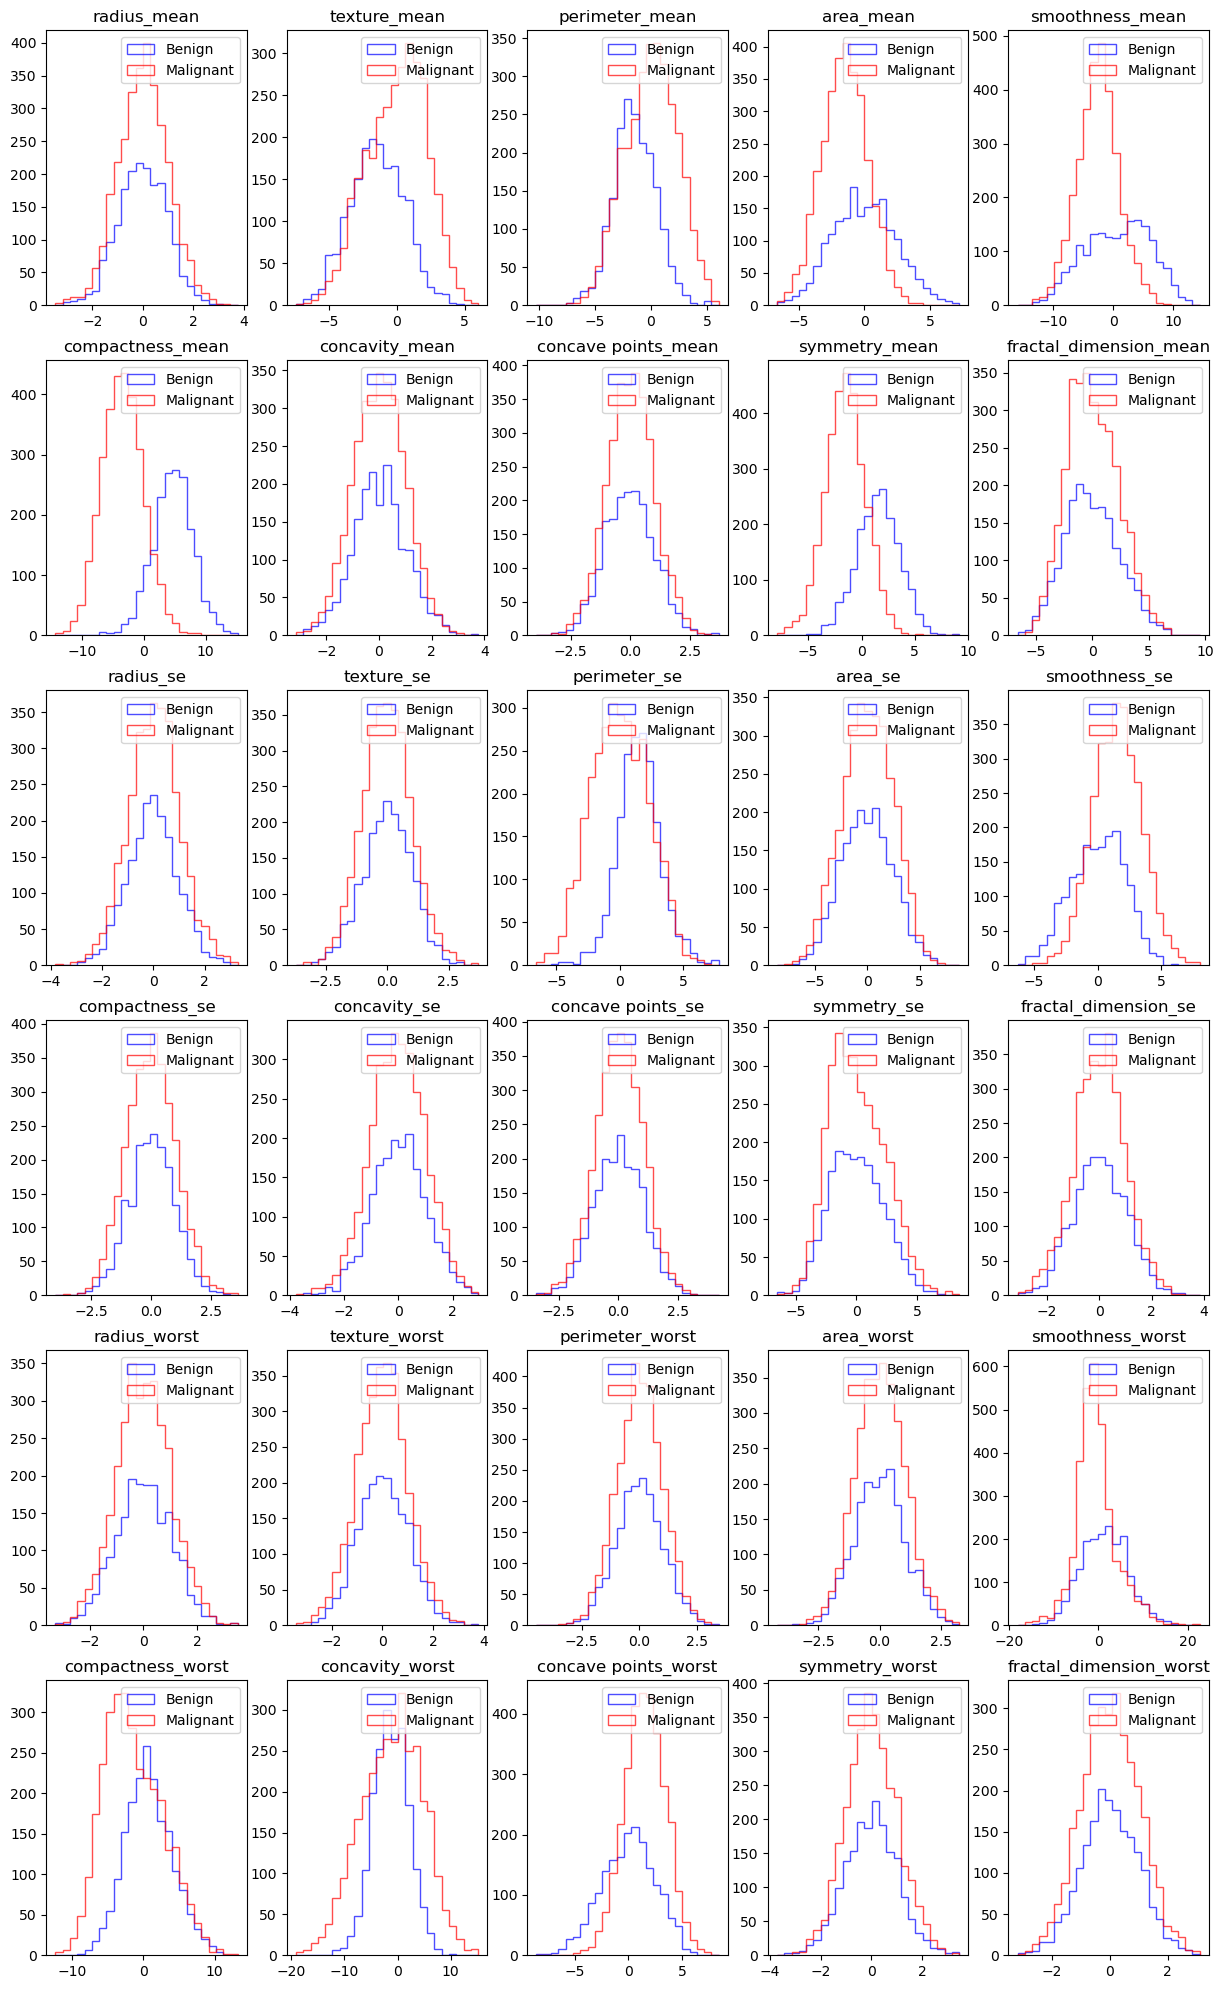

In [46]:
predict = df.diagnosis.unique() # unique values from diagnosis features : 1 and 0
dia_label=['Malignant', 'Benign'] # labels

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,25)) # axis configuration : 30 features on 6 * 5 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=df.columns[i+1]
    i=i+1
    ax.hist([df.loc[df.diagnosis == x, col] for x in predict], label=dia_label, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show() # show the 30 charts

# Univariate analysis conclusion

This histograms reveal that malignant tumors generally exhibit wider and more spread-out distributions with higher peaks at larger values for features like area_worst and concavity_worst, indicating greater variability and more extreme measurements compared to benign tumors, which tend to have narrower, more concentrated distributions. 

This suggests that features showing significant differences in spread and peak values between benign and malignant cases, such as area_worst and concave points_worst, may serve as important indicators for distinguishing tumor types, potentially aiding in medical diagnosis or predictive modeling.

I can see that some variables allow more easily than others to discriminate between cancerous and healthy cells.

'perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst', 'smoothness_mean will be removed due to its high correlation and geometrical connections.



# Checking and Removing Outliers

Numerical columns for outlier detection: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Column: radius_mean
Lower bound: -2.65, Upper bound: 2.65
Number of outliers: 52

Column: texture_mean
Lower bound: -7.12, Upper bound: 6.03
Number of outliers: 2

Column: perimeter_mean
Lower bound: -7.13, Upper bound: 5.93
Number of outliers: 9

Column: area_mean
Lower bound: -6.63, Upper bound: 4.60
Number of outliers: 58

Column: smoothness_mean
Lower bound: -13.24, Upper bound: 9.90
Number of outliers: 3

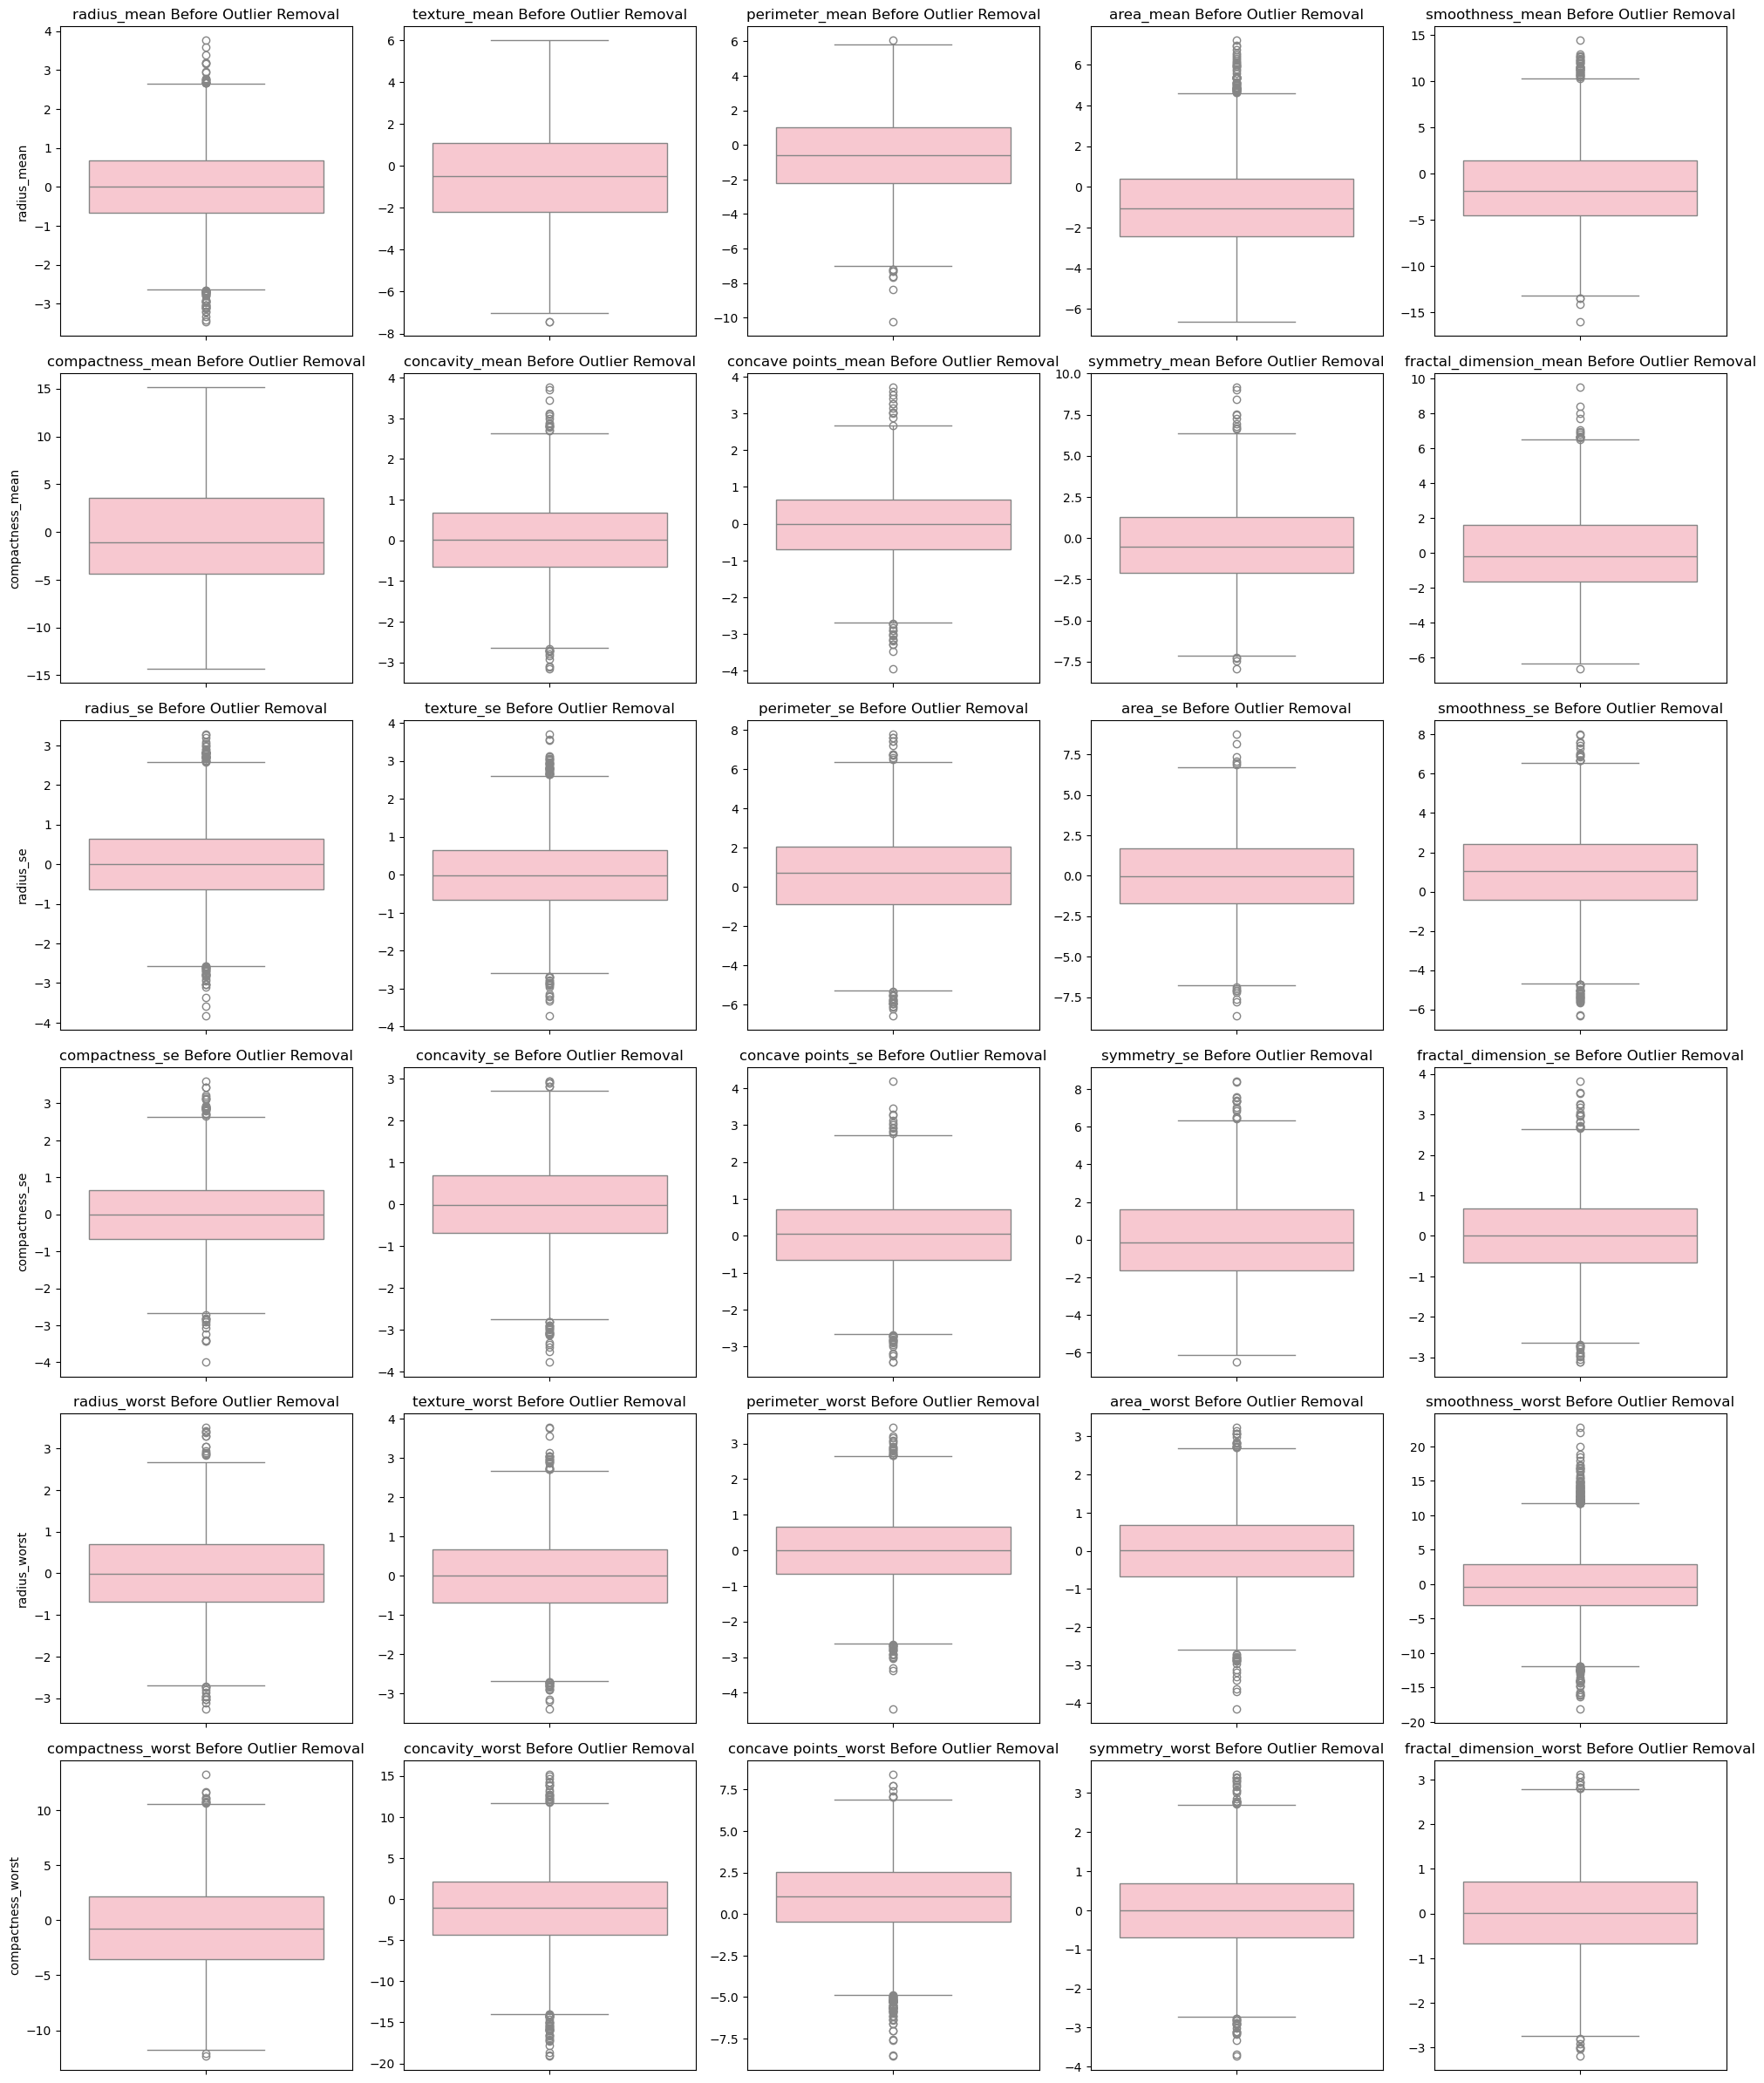

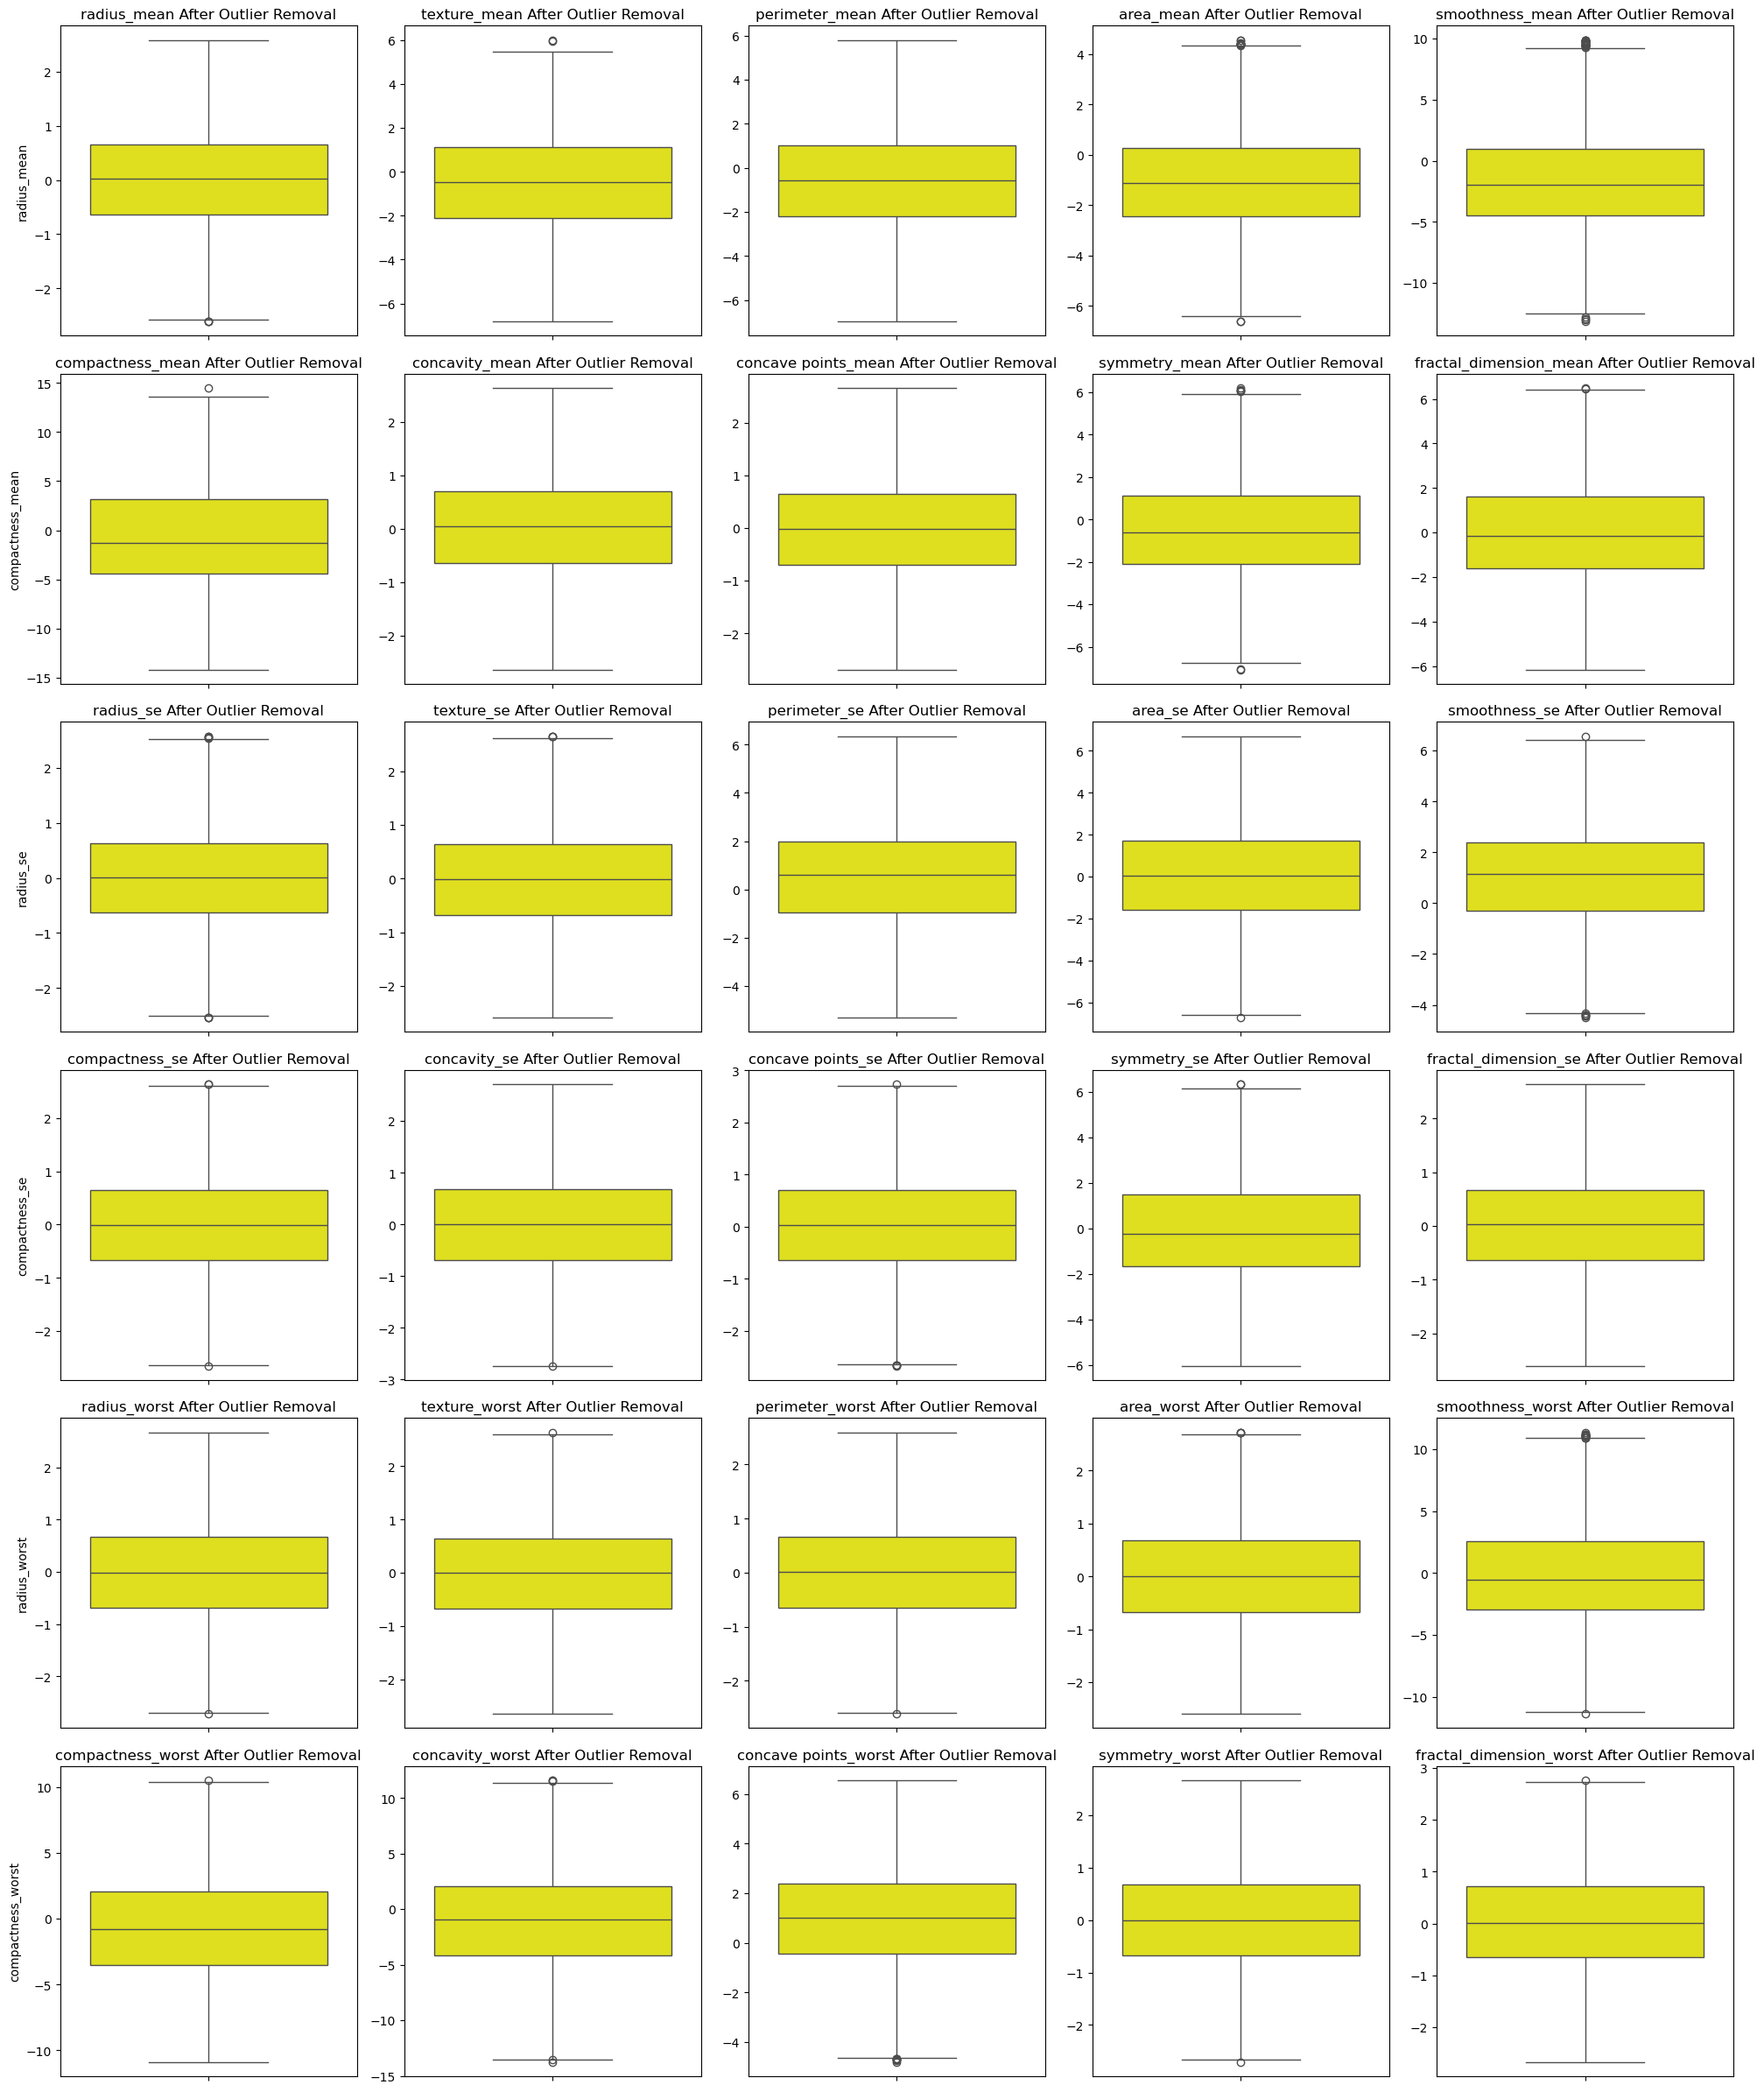

Cleaned dataset saved as 'tumor_cancer_no_outlier.csv'


In [47]:
if 'id' in df.columns:
    data = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    data_numeric = df.drop(columns=['diagnosis'])
else:
    data_numeric = data

# Select numerical columns for outlier detection
numerical_cols = data_numeric.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns for outlier detection: {numerical_cols}")

custom_palette = ['pink']
custom_palette1 = ['yellow']
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nColumn: {column}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    #print(f"Outlier values:\n{outliers}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

# Initialize the cleaned dataset
data_cleaned = df.copy()

# Apply outlier removal to each numerical column
for col in numerical_cols:
    data_cleaned, outliers = remove_outliers_iqr(data_cleaned, col, multiplier=1.5)

# Display the number of rows removed
rows_removed = len(df) - len(data_cleaned)
print(f"\nTotal rows before: {len(df)}")
print(f"Total rows after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {rows_removed}")

# --- Visualization: Box Plots Before and After for All Features in 5 Columns ---
# Before removal
n_cols = 5
n_rows_before = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_before))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_before, n_cols, i)
    sns.boxplot(data=df, y=col, palette=custom_palette)
    plt.title(f'{col} Before Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()

# After removal
n_rows_after = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_after))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_after, n_cols, i)
    sns.boxplot(data=data_cleaned, y=col, palette=custom_palette1)
    plt.title(f'{col} After Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()

# Save the cleaned dataset
data_cleaned.to_csv('tumor_cancer_no_outlier.csv', index=False)
print("Cleaned dataset saved as 'tumor_cancer_no_outlier.csv'")

In [54]:
#The features 'radius', 'perimeter' and 'area' are strongly correlated, which is not surprising given the geometrical relationship 
# by which they are linked. I decide to keep only the 'perimeter' variable.
df = pd.read_csv('tumor_cancer_no_outlier.csv')
drop_colums=['perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst', 'smoothness_mean']

tumor_cancerous = df.drop(columns=drop_colums)

print('Now the data set is only composed of ', len(tumor_cancerous.columns), 'features')


Now the data set is only composed of  24 features


In [49]:
tumor_cancerous.shape

(4079, 24)

In [50]:
tumor_cancerous.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

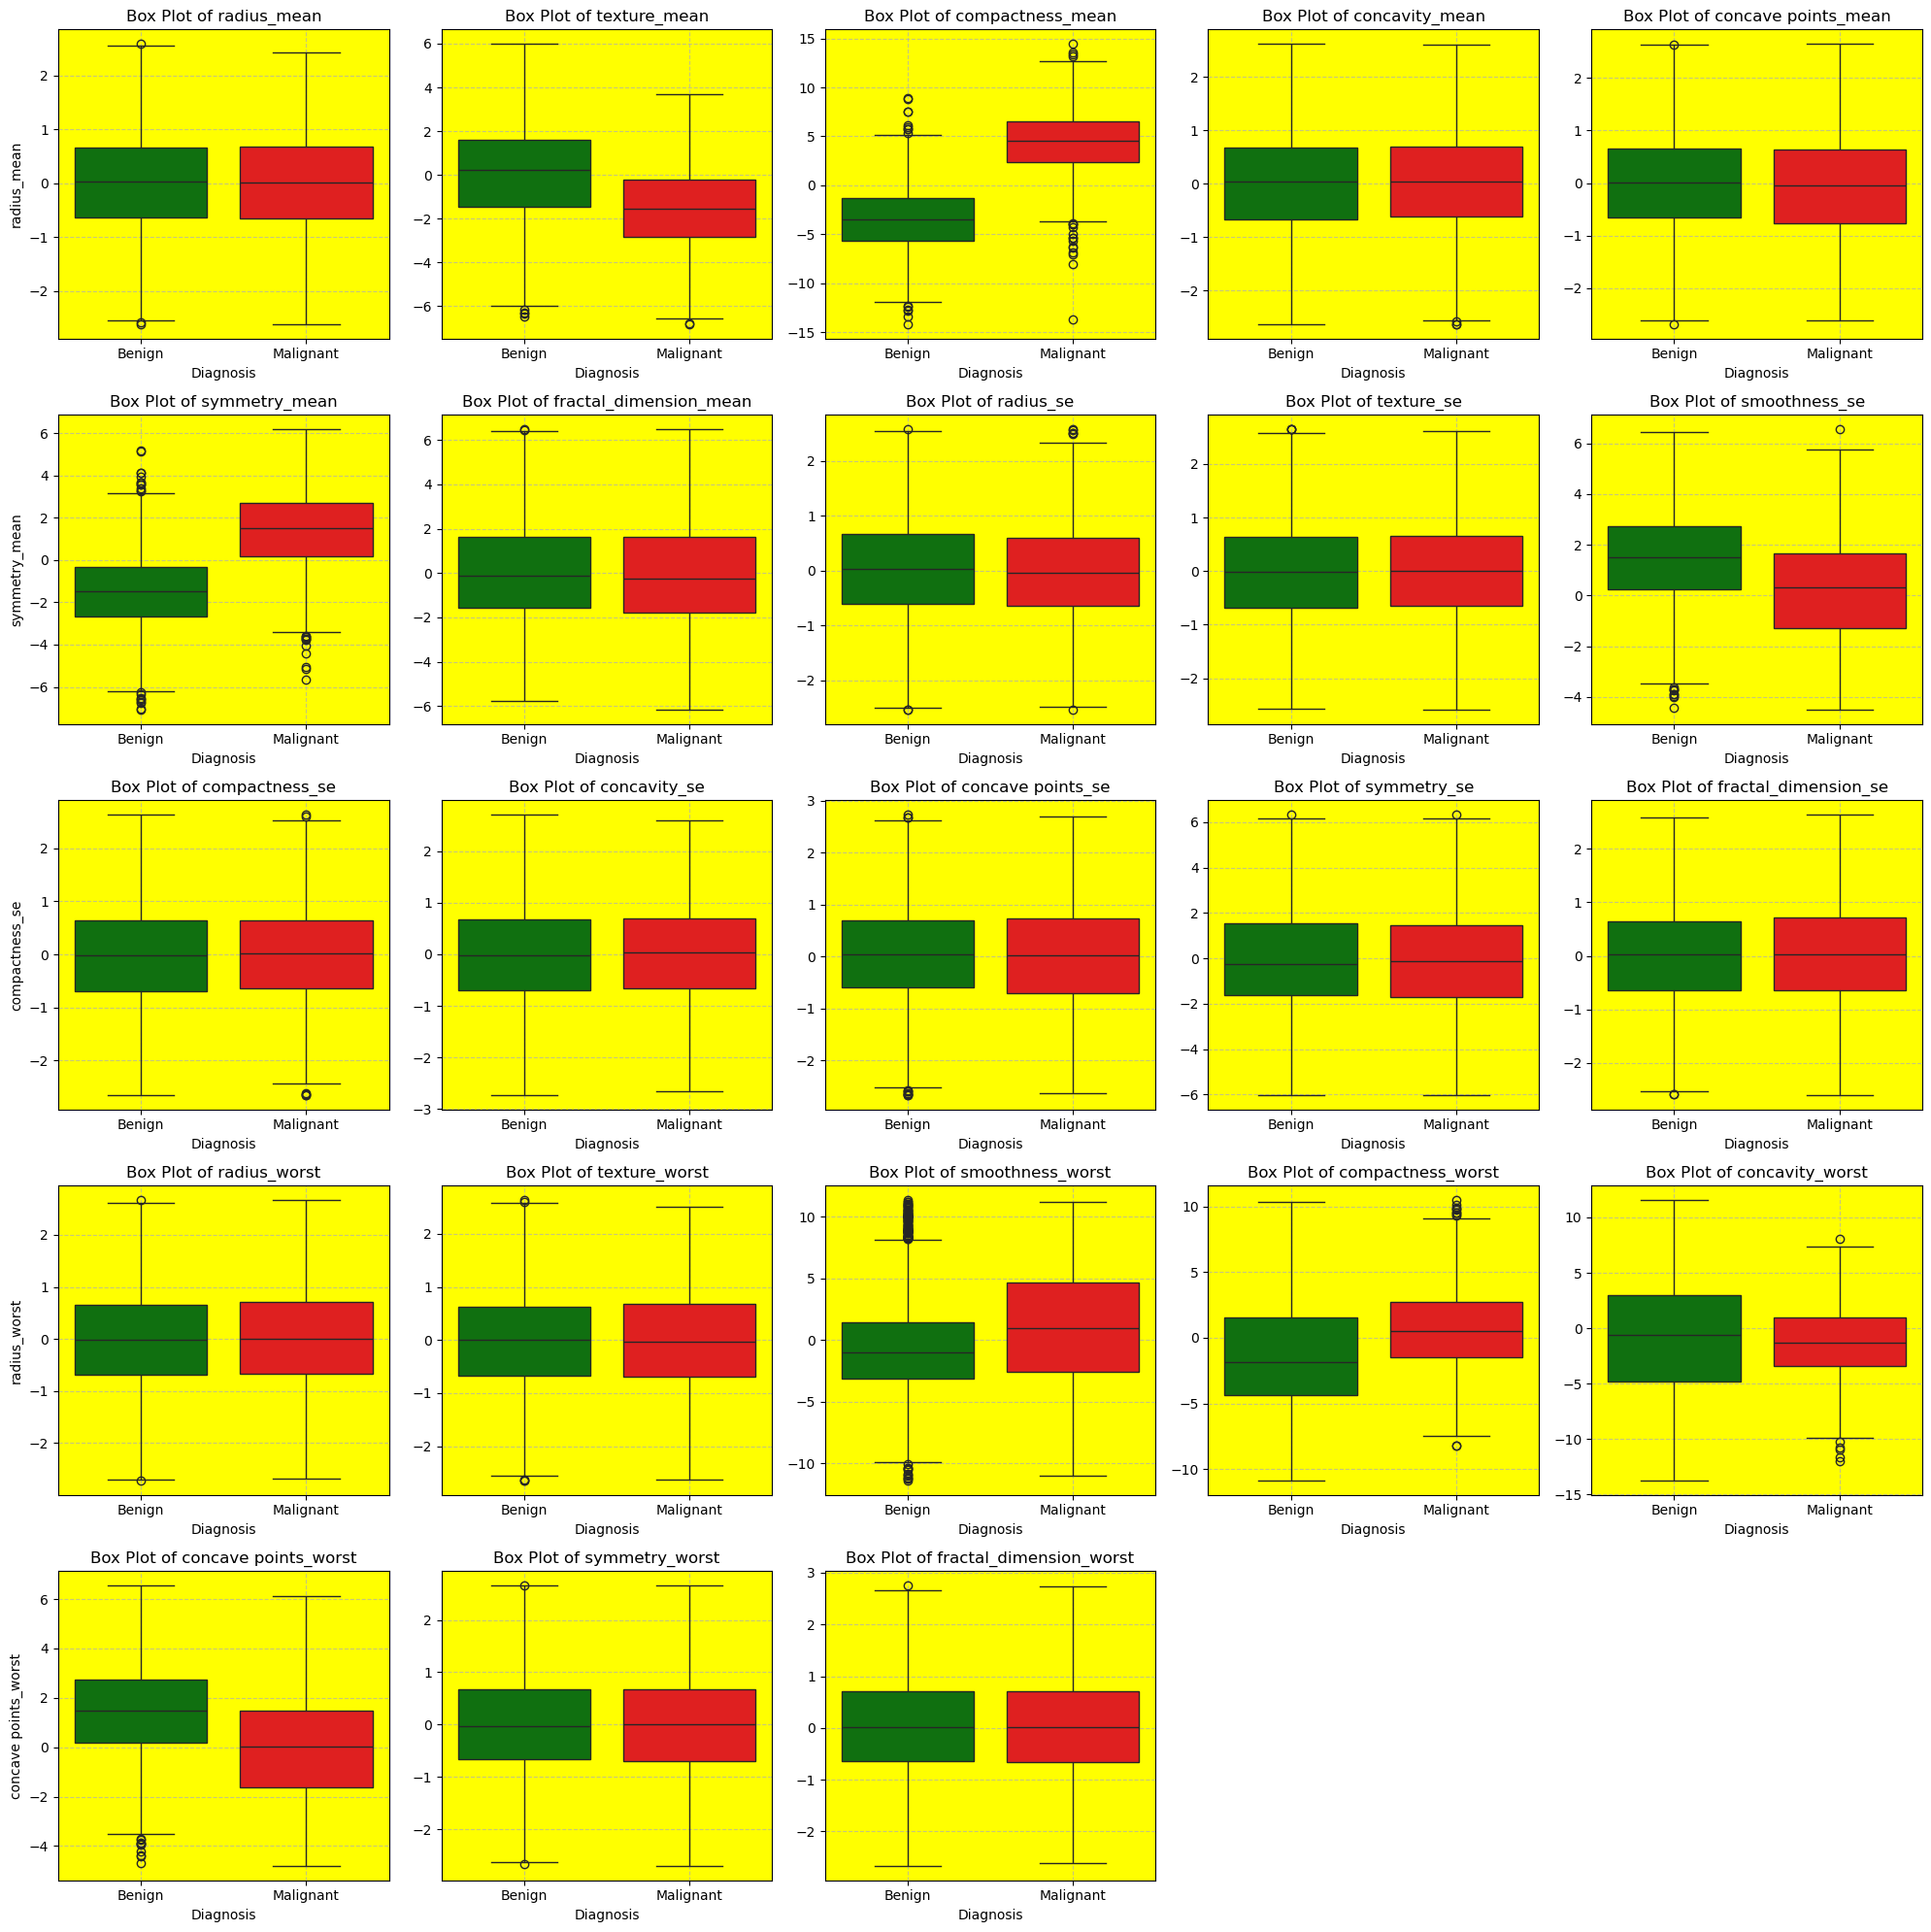

In [56]:

numerical_cols = tumor_cancerous.select_dtypes(include=[np.number]).columns.tolist()
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns

# Create a figure
plt.figure(figsize=(20, 4 * n_rows))

# Custom palette for benign (green) and malignant (red)
custom_palette = ['green', 'red']

# Create box plots for all numerical features
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Set background color to yellow
    plt.gca().set_facecolor('yellow')
    
    # Create box plot
    sns.boxplot(data=df, x='diagnosis', y=col, palette=custom_palette)
    
    # Add titles and labels
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Diagnosis')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Label x-axis explicitly
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

Most of the remaining features are now poorly correlated with each other variables.

In [58]:
print('The most important final features for breast cancer detection are : ')
list(tumor_cancerous.columns.values[1:])

The most important final features for breast cancer detection are : 


['radius_mean',
 'texture_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# ENCODING

In [59]:
#Label Encoding the Diagnosis Column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Transformation of Categorical Data into Numberical Data

tumor_cancerous['diagnosis'] = labelencoder.fit_transform(tumor_cancerous['diagnosis'])
tumor_cancerous.head()
	


,diagnosis,radius_mean,texture_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.425053,5.965067,-9.662919,-0.619291,-1.315248,-4.107378,3.530545,0.004089,-1.236248,...,-4.065763,-0.482608,0.615896,2.002757,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,0,1.624526,0.466168,2.390065,0.614031,-0.314448,1.867168,-1.968751,-0.238995,0.006158,...,2.562110,-1.101582,-0.118669,-1.379621,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
2,1,-1.124956,-2.165492,-7.283305,0.147977,-1.520045,-4.330120,-2.713016,-0.004324,0.252614,...,0.943081,0.669010,1.001215,0.350980,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
3,0,-0.349488,-1.915211,1.645780,-0.532385,-1.009785,-1.919263,-1.043254,0.500299,0.830134,...,3.197660,1.024906,-0.538012,1.444644,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049
4,0,-1.037911,-0.911027,2.604193,-0.534510,-0.966398,2.045196,-3.406979,-1.164255,0.028662,...,0.781103,-0.802852,-0.081568,0.684680,2.393778,-0.286439,-2.898318,0.016536,0.883488,0.194038


In [60]:
# New Datasets after Transformation
tumor_cancerous.head(15)

,diagnosis,radius_mean,texture_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.425053,5.965067,-9.662919,-0.619291,-1.315248,-4.107378,3.530545,0.004089,-1.236248,...,-4.065763,-0.482608,0.615896,2.002757,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,0,1.624526,0.466168,2.390065,0.614031,-0.314448,1.867168,-1.968751,-0.238995,0.006158,...,2.562110,-1.101582,-0.118669,-1.379621,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
2,1,-1.124956,-2.165492,-7.283305,0.147977,-1.520045,-4.330120,-2.713016,-0.004324,0.252614,...,0.943081,0.669010,1.001215,0.350980,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
3,0,-0.349488,-1.915211,1.645780,-0.532385,-1.009785,-1.919263,-1.043254,0.500299,0.830134,...,3.197660,1.024906,-0.538012,1.444644,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049
4,0,-1.037911,-0.911027,2.604193,-0.534510,-0.966398,2.045196,-3.406979,-1.164255,0.028662,...,0.781103,-0.802852,-0.081568,0.684680,2.393778,-0.286439,-2.898318,0.016536,0.883488,0.194038
5,1,0.120262,-0.717278,-7.030888,-0.114517,0.257259,-2.082970,-4.074605,-0.554809,2.093262,...,-0.732953,-1.312328,-0.068113,-0.440598,-3.029338,-2.052970,-7.318972,3.325497,-1.128341,-0.801243
6,1,1.594249,-2.780712,-7.724051,-1.147494,-0.166100,-4.150421,-2.891823,-1.807337,0.433236,...,-0.644927,1.695636,0.099114,-0.648779,-10.862417,-3.683523,-6.576865,1.173127,1.623558,1.083063
7,0,2.181834,-2.696210,5.749082,0.348183,-0.715832,0.344150,3.791457,-0.988253,0.252729,...,-3.976294,1.812377,-1.197448,1.943613,-5.462174,7.061307,2.934352,-1.184469,1.315890,0.005183
8,1,-0.207995,1.111825,-4.521649,0.255785,-1.090797,-1.883274,3.833294,0.075567,-0.734660,...,-3.847770,-1.107341,-1.761533,0.724839,-2.148749,7.632274,1.149732,2.078927,0.571753,-1.177050
9,0,0.685827,-1.299916,9.448595,-0.818898,-0.490464,4.363181,-2.876065,0.287294,-0.038565,...,-0.828670,-0.536631,0.085608,0.581271,-2.554882,3.955835,-0.677487,-1.366290,-0.257480,0.064067


In [61]:
# New Datasets after Transformation
tumor_cancerous.tail(15)

,diagnosis,radius_mean,texture_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
4064,1,-0.494533,3.771830,-3.062589,1.616423,0.829370,-1.687576,5.025029,-0.325617,-0.505634,...,-1.838960,-0.239678,1.213404,0.498779,1.072199,2.150312,3.778733,-1.455220,-2.204276,-1.759023
4065,0,0.382513,-3.818279,4.943482,0.930995,-0.360500,-1.457430,2.942412,-0.440357,0.782138,...,-4.143458,-0.317426,0.287663,1.457797,-4.210005,3.047809,6.032766,3.824446,0.236345,-0.331069
4066,1,0.528068,0.773455,-6.378435,-0.568372,-0.961604,0.474453,-3.022823,0.560026,0.591506,...,0.730596,0.048265,0.324944,0.407025,-2.087818,-6.037491,-3.283846,-1.003937,-0.336319,0.070696
4067,0,-0.014993,0.064377,3.663800,-0.411889,0.031073,-1.221482,5.085636,1.028945,1.300980,...,-2.004991,-2.203974,-0.394414,-0.731186,2.594736,1.087612,3.045666,-0.981321,-1.744903,1.476718
4068,0,0.695010,-2.366287,1.833459,-0.791226,1.355690,1.495879,-3.513629,-0.387830,0.793301,...,2.203544,-0.074228,2.096039,0.696793,-2.150174,-0.028853,-5.273351,0.286680,-0.189200,1.212348
4069,0,-0.270827,-3.083328,6.308976,-0.039445,-0.291613,-0.839091,2.805599,0.198616,0.624947,...,-3.049848,1.254795,0.365684,-0.434034,-3.274723,3.418268,3.265869,1.085428,0.774265,0.853345
4070,0,0.571774,-3.350725,9.450397,-0.914023,0.052516,0.968827,2.910244,1.744138,-0.352949,...,-3.119676,-0.002970,-0.459039,-0.374149,-5.844507,7.647307,1.706661,-2.696538,0.528448,0.871138
4071,1,-0.890709,-1.744667,-8.730957,1.014950,0.150315,-1.641741,-2.366586,-0.043289,1.115161,...,0.560151,-1.390598,-0.484623,-0.873845,-6.758636,-0.993272,-5.959246,-0.792262,0.962370,0.849971
4072,0,0.607632,0.730504,4.449139,1.268025,0.570505,3.330512,3.637034,-0.378274,0.419124,...,0.573820,-1.465967,-0.144053,0.040834,8.610842,1.644835,-4.762643,-3.009873,0.867389,0.014823
4073,1,0.429157,1.276377,-8.152545,-0.707879,0.264728,-4.200273,-0.507865,-1.204635,0.222347,...,-0.694157,0.247858,0.435248,-0.933733,-1.374265,3.341682,-4.045831,1.980894,0.003340,0.350872


In [62]:
# New Datasets Information after Transformation
tumor_cancerous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                4079 non-null   int32  
 1   radius_mean              4079 non-null   float64
 2   texture_mean             4079 non-null   float64
 3   compactness_mean         4079 non-null   float64
 4   concavity_mean           4079 non-null   float64
 5   concave points_mean      4079 non-null   float64
 6   symmetry_mean            4079 non-null   float64
 7   fractal_dimension_mean   4079 non-null   float64
 8   radius_se                4079 non-null   float64
 9   texture_se               4079 non-null   float64
 10  smoothness_se            4079 non-null   float64
 11  compactness_se           4079 non-null   float64
 12  concavity_se             4079 non-null   float64
 13  concave points_se        4079 non-null   float64
 14  symmetry_se             

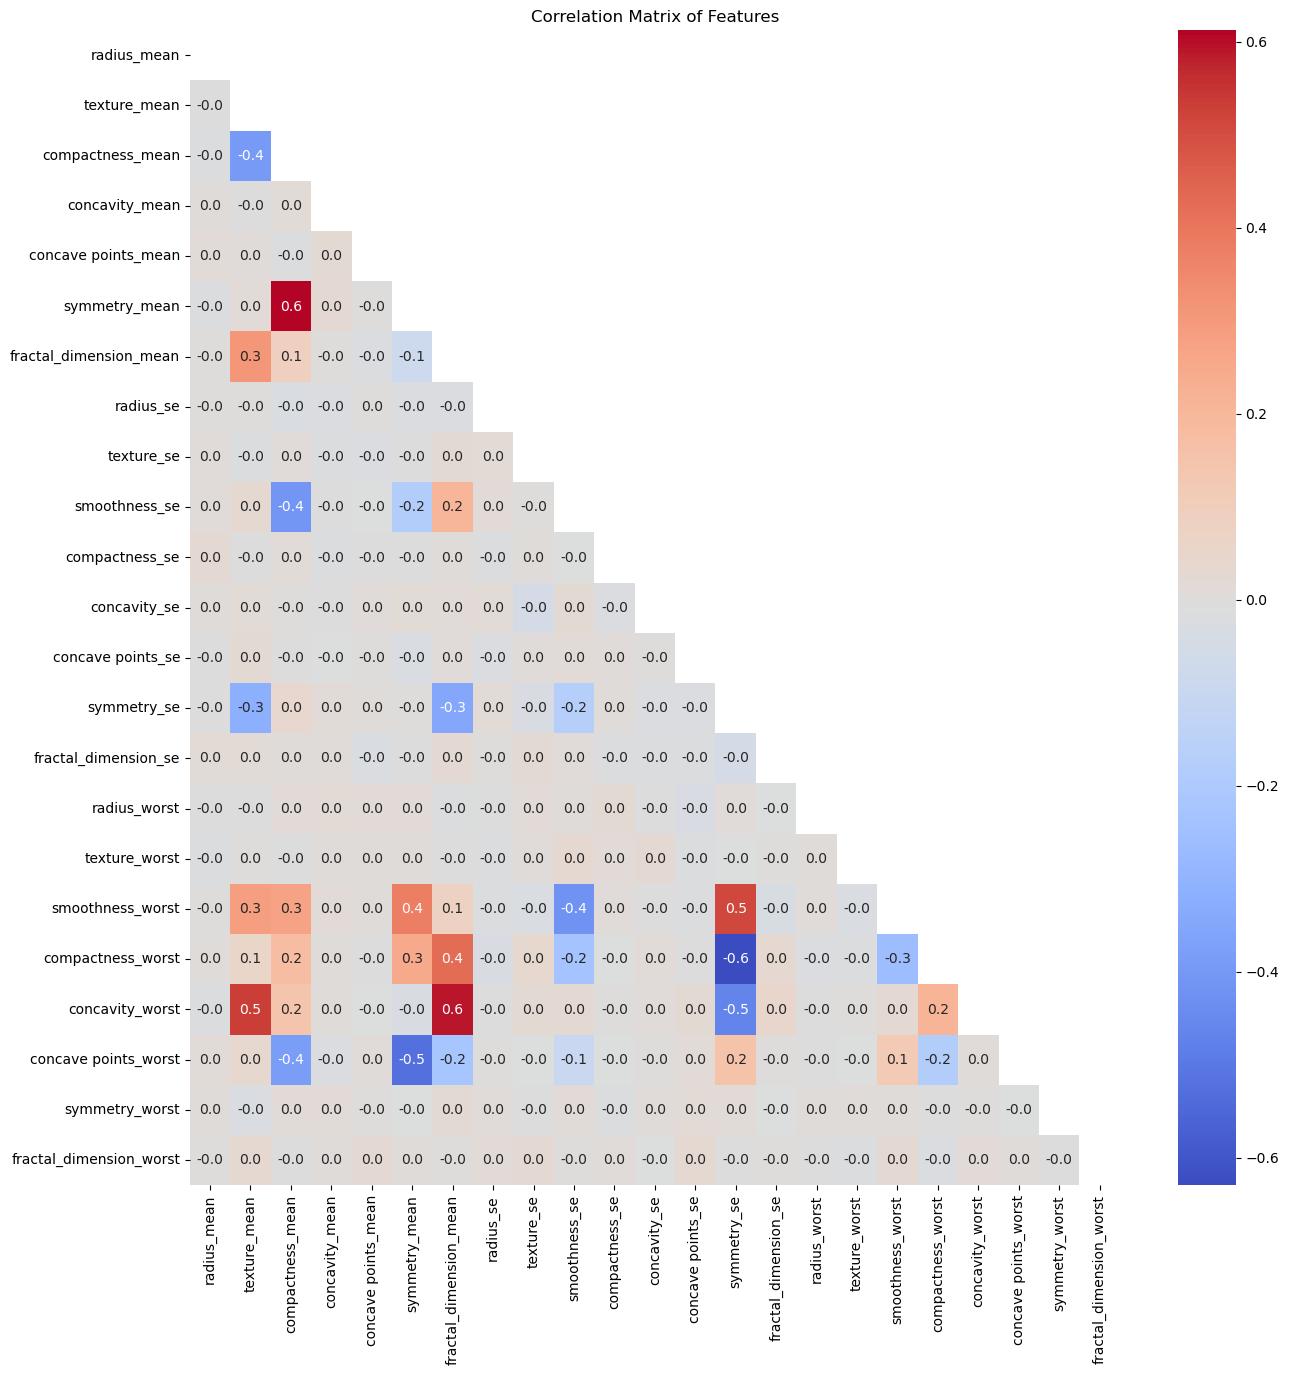

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(tumor_cancerous.drop(columns=['diagnosis'], errors='ignore').corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(tumor_cancerous.drop(columns=['diagnosis'], errors='ignore').corr(), dtype=bool)))
plt.title("Correlation Matrix of the New set of Features")
plt.show()


# Spliting Datas 20% test 80% train

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# The Training Set is 80% of the Dataset while the Test Set is 20% of the Dataset
# The Random State is set to 42
x = tumor_cancerous.drop('diagnosis', axis = 1)#features
y = tumor_cancerous['diagnosis']#target variable
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=22)



print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Shape of Output Train set:", y_train.shape)
print("Shape of Output Test set:", y_test.shape)
print("Count of Training set according to M & B:", y_train.value_counts())
print("Count of Test set according to M & B:", y_test.value_counts())

In [ ]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
diagtrain = sns.countplot(x=y_train, palette=['#1f77b4', '#ff7f0e'])
diagtrain.bar_label(diagtrain.containers[0])
diagtrain.bar_label(diagtrain.containers[1])
plt.title('Train Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
diagtest = sns.countplot(x=y_test, palette=['#1f77b4', '#ff7f0e'])
diagtest.bar_label(diagtest.containers[0])
diagtest.bar_label(diagtest.containers[1])
plt.title('Test Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersample.fit_resample(X_train, y_train)

y_under.value_counts()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model=RandomForestClassifier(n_estimators=100, random_state=22, max_depth=5)
rf_model.fit(X_under,y_under)

In [ ]:
predictions= rf_model.predict(X_test)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)


display(x_train.head(15))
display(x_test.head(15))

In [ ]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaled.shape)
print("The shape of x_test_scaler is: ",x_test_scaled.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

# Logistic Regresion

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import f1_score

In [ ]:
#Implementation of Models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()

model_list = [knn,dt,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train_scaled,y_train)
    y_train_pred = i_model.predict(x_train_scaled)
    y_test_pred = i_model.predict(x_test_scaled)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

In [ ]:
# Create a dictionary to store the classifiers
classifiers = {
    'KNN Classifier': knn,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaled)
    print(classification_report(y_test_pred, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [knn, dt, gnb]
model_names = ['KNN Classifier', 'Decision Tree', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train_scaled, y_train_pred)

    # Make predictions on the test data
    y_pred = model.predict(x_test_scaled)

    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
#Create a list for models
models = ['KNN Classifier','Decision Tree Classifier','Gaussian Naive Bayes']

In [ ]:
#visualizing the train model accuracy

sns.barplot(y=models,x=train_acc)
plt.show()

In [ ]:
# visualizing the test model accuracy

sns.barplot(y=models,x=test_acc)
plt.show()

In [ ]:
#Display summary of the performance
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [knn, dt, gnb]
model_names = ['KNN Classifier', 'Decision Tree', 'Gaussian Naive Bayes']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [ ]:
# Apply SMOTE to the training set
smote =  SMOTE(random_state=42)
x_train_resampled,y_train_resampled= smote.fit_resample(x_train_scaler, y_train)

In [ ]:
# Plot distribution of target variable before and after SMOTE
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(data=tumor_cancerous, x='diagnosis', ax=axs[0], palette=['#1f77b4', '#ff7f0e'])
if axs[0].containers:
	axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before SMOTE')
axs[0].set_xticklabels(['Benign', 'Malignant'])

sns.countplot(data=pd.DataFrame(y_train_resampled, columns=['diagnosis']), x='diagnosis', ax=axs[1], palette=['#1f77b4', '#ff7f0e'])
if axs[1].containers:
	axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After SMOTE')
axs[1].set_xticklabels(['Benign', 'Malignant'])

plt.show()


In [ ]:
# checking the shape of the train and test datasets

print("The shape of x_train_resampled is: ",x_train_resampled.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train_resampled is: ",y_train_resampled.shape)
print("The shape of y_test is: ",y_test.shape)

In [ ]:
#Cretae list of models
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier()
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

In [ ]:
# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gnb = GaussianNB()

In [ ]:
# Create a dictionary of models
models = {
    'DecisionTreeClassifier': dt,
    'GaussianNB': gnb,
    'KNeighborsClassifier': knn
}

# Iterate over the models
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy}')

In [ ]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_resampled, y_train_resampled)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_knn = KNeighborsClassifier(**knn_grid_search.best_params_)
best_knn.fit(x_train_resampled, y_train_resampled)

# Get the training accuracy score
train_knn_accuracy = best_knn.score(x_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
knn_y_pred = best_knn.predict(x_test_scaler)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_confusion = confusion_matrix(y_test, knn_y_pred)

# Print the evaluation results
print("KNN Classifier")
print("Training Accuracy:", train_knn_accuracy)
print("Test Accuracy:", knn_accuracy)


In [ ]:
# pairplot for worst columns
#Next We show the corellation between the Worst Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Worst Columns and the Diagnosis Column
sns.pairplot(df[theworst_col],hue = 'diagnosis', palette='Oranges')
plt.show()

In [ ]:
#Pair Plot of the Dataset According to the Diagnosis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

In [ ]:
#Correlation Matrix of the first 31 Columns
#df.corr()
df.iloc[:, 0:33].corr()

In [ ]:
df.corr()['diagnosis'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, fmt='.1f', cbar=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.1)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print(df.shape)
print(df.columns)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[themean_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[themean_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

In [ ]:
corr_matrix = df[themean_col].corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.50)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[thestandarddev_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[thestandarddev_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

In [ ]:
corr_matrix1 = df[thestandarddev_col].corr().abs() 

mask1 = np.triu(np.ones_like(corr_matrix1, dtype = bool))
tri_df = corr_matrix1.mask(mask1)

to_drop1 = [z for z in tri_df.columns if any(tri_df[z] > 0.20)]

df = df.drop(to_drop1, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop1)

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:, 2:26].corr(), cmap='coolwarm',annot=True, fmt='.1f', cbar=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
corr_matrix1 = df.iloc[:, 1:26].corr().abs()

mask1 = np.triu(np.ones_like(corr_matrix1, dtype = bool))
tri_df = corr_matrix1.mask(mask1)

to_drop1 = [z for z in tri_df.columns if any(tri_df[z] > 0.60)]
df = df.drop(to_drop1, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop1)

In [ ]:
df.drop('perimeter_worst', axis=1, inplace=True)
df.drop('area_worst', axis=1, inplace=True)


In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# The Training Set is 80% of the Dataset while the Test Set is 20% of the Dataset
# The Random State is set to 42

X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=22)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Count of Training set according to M & B:", y_train.value_counts())
print("Count of Test set according to M & B:", y_test.value_counts())



In [ ]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=['#1f77b4', '#ff7f0e'])
plt.title('Train Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette=['#1f77b4', '#ff7f0e'])
plt.title('Test Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#I think I need to Undersample the Dataset to balance the Dataset
#I will use the RandomUnderSampler to balance the Dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_rus = pd.DataFrame(X_train_rus, columns=X_train.columns)
y_train_rus = pd.Series(y_train_rus)    #This will balance the Dataset
print("Count of Training set according to M & B after RandomUnderSampler:", y_train_rus.value_counts()) #This will show the count of the Balanced Dataset
